# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></div><div class="lev1 toc-item"><a href="#Network-Visualisation" data-toc-modified-id="Network-Visualisation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Network Visualisation</a></div><div class="lev2 toc-item"><a href="#Yearly-Networks" data-toc-modified-id="Yearly-Networks-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Yearly Networks</a></div><div class="lev2 toc-item"><a href="#Monthly-networks" data-toc-modified-id="Monthly-networks-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Monthly networks</a></div><div class="lev1 toc-item"><a href="#Attribute-Analysis" data-toc-modified-id="Attribute-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Attribute Analysis</a></div><div class="lev2 toc-item"><a href="#Traditional-Measures" data-toc-modified-id="Traditional-Measures-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Traditional Measures</a></div><div class="lev3 toc-item"><a href="#Centrality" data-toc-modified-id="Centrality-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Centrality</a></div><div class="lev3 toc-item"><a href="#Assortativity-&amp;-Linear-Algebra" data-toc-modified-id="Assortativity-&amp;-Linear-Algebra-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Assortativity &amp; Linear Algebra</a></div><div class="lev2 toc-item"><a href="#Complex-Trace-Attributes" data-toc-modified-id="Complex-Trace-Attributes-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Complex Trace Attributes</a></div><div class="lev2 toc-item"><a href="#Matrix-/Matrix-Decomposition" data-toc-modified-id="Matrix-/Matrix-Decomposition-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Matrix /Matrix Decomposition</a></div><div class="lev2 toc-item"><a href="#Music-Attributes" data-toc-modified-id="Music-Attributes-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Music Attributes</a></div><div class="lev2 toc-item"><a href="#Aggregation-Measures" data-toc-modified-id="Aggregation-Measures-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Aggregation Measures</a></div><div class="lev1 toc-item"><a href="#Overview-Plots" data-toc-modified-id="Overview-Plots-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Overview Plots</a></div><div class="lev1 toc-item"><a href="#Correlation-Analysis" data-toc-modified-id="Correlation-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Correlation Analysis</a></div><div class="lev2 toc-item"><a href="#Correlation-&gt;-0.7" data-toc-modified-id="Correlation->-0.7-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Correlation &gt; 0.7</a></div><div class="lev1 toc-item"><a href="#Regression-Analysis-for-Feature-Ranking" data-toc-modified-id="Regression-Analysis-for-Feature-Ranking-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Regression Analysis for Feature Ranking</a></div><div class="lev1 toc-item"><a href="#Aggregation-Measures" data-toc-modified-id="Aggregation-Measures-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Aggregation Measures</a></div>

# Introduction

Dynamic Network Analysis of Enron Email Network Data.

Here I consolidate earlier analysis to make presentation of the final results easier and more readable.

In [172]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
import random
from scipy.signal import *
from numpy.linalg import *
from sklearn.decomposition import *
from sklearn.preprocessing import *
import librosa
#plotting parameters
%matplotlib inline
sns.set(style="whitegrid", color_codes=True, context='paper')
plt.rc('axes', grid=False, titlesize='large', labelsize='large',labelweight='heavy')
plt.rc('lines', linewidth=4)
plt.rc('font',family='serif',size=16, serif='LiberationSerif')
plt.rc('figure', figsize = (15,6),titlesize='large',titleweight='heavy')
plt.rc('grid',linewidth=5)

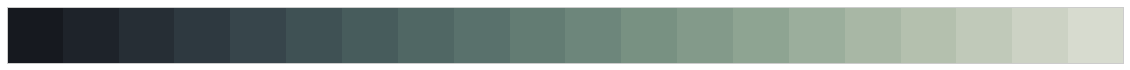

In [214]:
sns.palplot(sns.cubehelix_palette(20, hue=0.3, reverse=True, rot=-0.55, dark=0.1))

In [216]:
sns.set_palette(sns.cubehelix_palette(20, hue=0.3, reverse=True, rot=-0.55, dark=0.1))

In [217]:
data = pd.read_excel("../Data/data 03.2.xlsx")

In [218]:
years = sorted(set(data.year))
years = years[1:]
years

[1998, 1999, 2000, 2001, 2002]

In [219]:
months = ['Nov98', 'Dec98', 'jan_99', 'feb_99', 'mar_99', 'apr_99', 'may_99', 'jun_99', 'jul_99', 'aug_99', 'sep_99', 'oct_99',\
          'nov_99', 'dec_99', 'jan_2k', 'feb_2k', 'mar_2k', 'apr_2k', 'may_2k', 'jun_2k', 'jul_2k', 'aug_2k', 'sep_2k', 'oct_2k',\
          'nov_2k', 'dec_2k', 'jan_2k1', 'feb_2k1', 'mar_2k1', 'apr_2k1', 'may_2k1', 'jun_2k1', 'jul_2k1', 'aug_2k1', 'sep_2k1',\
          'oct_2k1', 'nov_2k1', 'dec_2k1', 'jan_2k2', 'feb_2k2', 'mar_2k2', 'apr_2k2', 'may_2k2', 'jun_2k2']

In [220]:
df_98 = data[data.year==years[0]]
df_99 = data[data.year==years[1]]
df_2k = data[data.year==years[2]]
df_2k1 = data[data.year==years[3]]
df_2k2 = data[data.year==years[4]]

In [221]:
def create_graph(df):
    tmp = df.values[:,1:3]
    G= nx.Graph()
    G = nx.from_edgelist(tmp)
    
    return G

In [222]:
Gt0 = create_graph(df_98)
Gt1 = create_graph(df_99)
Gt2 = create_graph(df_2k)
Gt3 = create_graph(df_2k1)
Gt4 = create_graph(df_2k2)

In [223]:
nov_98 = df_98[df_98.month==11]
dec_98= df_98[df_98.month==12]

G_nov98 = create_graph(nov_98)
G_dec98 = create_graph(dec_98)

In [224]:
jan_99=df_99[df_99.month==1]
feb_99=df_99[df_99.month==2]
mar_99=df_99[df_99.month==3]
apr_99=df_99[df_99.month==4]
may_99=df_99[df_99.month==5]
jun_99=df_99[df_99.month==6]
jul_99=df_99[df_99.month==7]
aug_99=df_99[df_99.month==8]
sep_99=df_99[df_99.month==9]
oct_99=df_99[df_99.month==10]
nov_99=df_99[df_99.month==11]
dec_99=df_99[df_99.month==12]


G_jan_99=create_graph(jan_99)
G_feb_99=create_graph(feb_99)
G_mar_99=create_graph(mar_99)
G_apr_99=create_graph(apr_99)
G_may_99=create_graph(may_99)
G_jun_99=create_graph(jun_99)
G_jul_99=create_graph(jul_99)
G_aug_99=create_graph(aug_99)
G_sep_99=create_graph(sep_99)
G_oct_99=create_graph(oct_99)
G_nov_99=create_graph(nov_99)
G_dec_99=create_graph(dec_99)

In [225]:
jan_2k=df_2k[df_2k.month==1]
feb_2k=df_2k[df_2k.month==2]
mar_2k=df_2k[df_2k.month==3]
apr_2k=df_2k[df_2k.month==4]
may_2k=df_2k[df_2k.month==5]
jun_2k=df_2k[df_2k.month==6]
jul_2k=df_2k[df_2k.month==7]
aug_2k=df_2k[df_2k.month==8]
sep_2k=df_2k[df_2k.month==9]
oct_2k=df_2k[df_2k.month==10]
nov_2k=df_2k[df_2k.month==11]
dec_2k=df_2k[df_2k.month==12]


G_jan_2k=create_graph(jan_2k)
G_feb_2k=create_graph(feb_2k)
G_mar_2k=create_graph(mar_2k)
G_apr_2k=create_graph(apr_2k)
G_may_2k=create_graph(may_2k)
G_jun_2k=create_graph(jun_2k)
G_jul_2k=create_graph(jul_2k)
G_aug_2k=create_graph(aug_2k)
G_sep_2k=create_graph(sep_2k)
G_oct_2k=create_graph(oct_2k)
G_nov_2k=create_graph(nov_2k)
G_dec_2k=create_graph(dec_2k)

In [226]:
jan_2k1=df_2k1[df_2k1.month==1]
feb_2k1=df_2k1[df_2k1.month==2]
mar_2k1=df_2k1[df_2k1.month==3]
apr_2k1=df_2k1[df_2k1.month==4]
may_2k1=df_2k1[df_2k1.month==5]
jun_2k1=df_2k1[df_2k1.month==6]
jul_2k1=df_2k1[df_2k1.month==7]
aug_2k1=df_2k1[df_2k1.month==8]
sep_2k1=df_2k1[df_2k1.month==9]
oct_2k1=df_2k1[df_2k1.month==10]
nov_2k1=df_2k1[df_2k1.month==11]
dec_2k1=df_2k1[df_2k1.month==12]


G_jan_2k1=create_graph(jan_2k1)
G_feb_2k1=create_graph(feb_2k1)
G_mar_2k1=create_graph(mar_2k1)
G_apr_2k1=create_graph(apr_2k1)
G_may_2k1=create_graph(may_2k1)
G_jun_2k1=create_graph(jun_2k1)
G_jul_2k1=create_graph(jul_2k1)
G_aug_2k1=create_graph(aug_2k1)
G_sep_2k1=create_graph(sep_2k1)
G_oct_2k1=create_graph(oct_2k1)
G_nov_2k1=create_graph(nov_2k1)
G_dec_2k1=create_graph(dec_2k1)

In [227]:
jan_2k2=df_2k2[df_2k2.month==1]
feb_2k2=df_2k2[df_2k2.month==2]
mar_2k2=df_2k2[df_2k2.month==3]
apr_2k2=df_2k2[df_2k2.month==4]
may_2k2=df_2k2[df_2k2.month==5]
jun_2k2=df_2k2[df_2k2.month==6]
jul_2k2=df_2k2[df_2k2.month==7]
aug_2k2=df_2k2[df_2k2.month==8]
sep_2k2=df_2k2[df_2k2.month==9]
oct_2k2=df_2k2[df_2k2.month==10]
nov_2k2=df_2k2[df_2k2.month==11]
dec_2k2=df_2k2[df_2k2.month==12]


G_jan_2k2=create_graph(jan_2k2)
G_feb_2k2=create_graph(feb_2k2)
G_mar_2k2=create_graph(mar_2k2)
G_apr_2k2=create_graph(apr_2k2)
G_may_2k2=create_graph(may_2k2)
G_jun_2k2=create_graph(jun_2k2)
G_jul_2k2=create_graph(jul_2k2)
G_aug_2k2=create_graph(aug_2k2)
G_sep_2k2=create_graph(sep_2k2)
G_oct_2k2=create_graph(oct_2k2)
G_nov_2k2=create_graph(nov_2k2)
G_dec_2k2=create_graph(dec_2k2)

In [228]:
all_year_G  =tuple([Gt0,Gt1,Gt2,Gt3,Gt4])

In [229]:
all_month_G = tuple([G_nov98,G_dec98,G_jan_99,G_feb_99,G_mar_99,G_apr_99,G_may_99,G_jun_99,G_jul_99,G_aug_99,G_sep_99,G_oct_99,\
              G_nov_99,G_dec_99,G_jan_2k,G_feb_2k,G_mar_2k,G_apr_2k,G_may_2k,G_jun_2k,G_jul_2k,G_aug_2k,G_sep_2k,\
              G_oct_2k,G_nov_2k,G_dec_2k,G_jan_2k1,G_feb_2k1,G_mar_2k1,G_apr_2k1,G_may_2k1,G_jun_2k1,G_jul_2k1,\
              G_aug_2k1,G_sep_2k1,G_oct_2k1,G_nov_2k1,G_dec_2k1,G_jan_2k2,G_feb_2k2,G_mar_2k2,G_apr_2k2,G_may_2k2,G_jun_2k2])

# Network Visualisation

- Node Link Diagram
- Audio Waveform
- Matrix Visualisation

## Yearly Networks

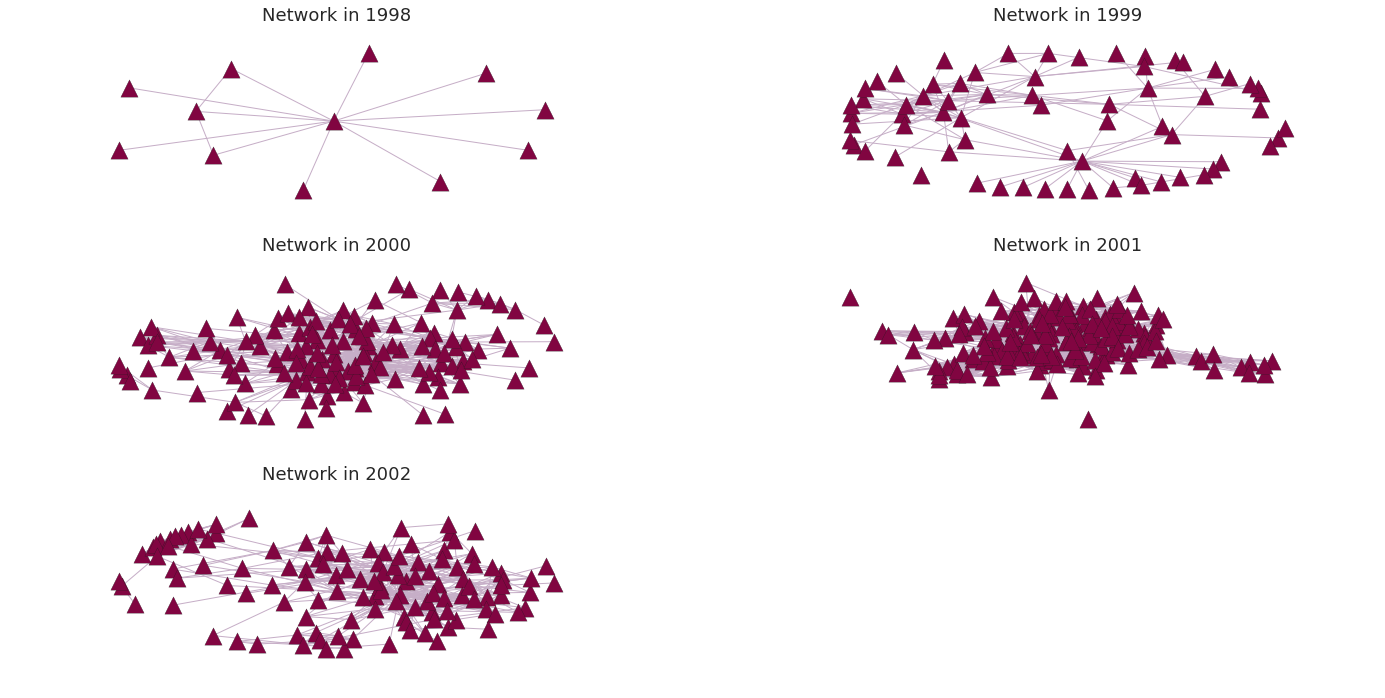

In [230]:
plt.figure(figsize=(24,24))
for i in range(len(all_year_G)):
    plt.subplot(6,2,i+1)
    nx.draw_spring(all_year_G[i],  node_color='#810541',node_shape='^',edge_color ='#C6AEC7')
    plt.title("Network in "  + str(years[i]), fontsize=18)


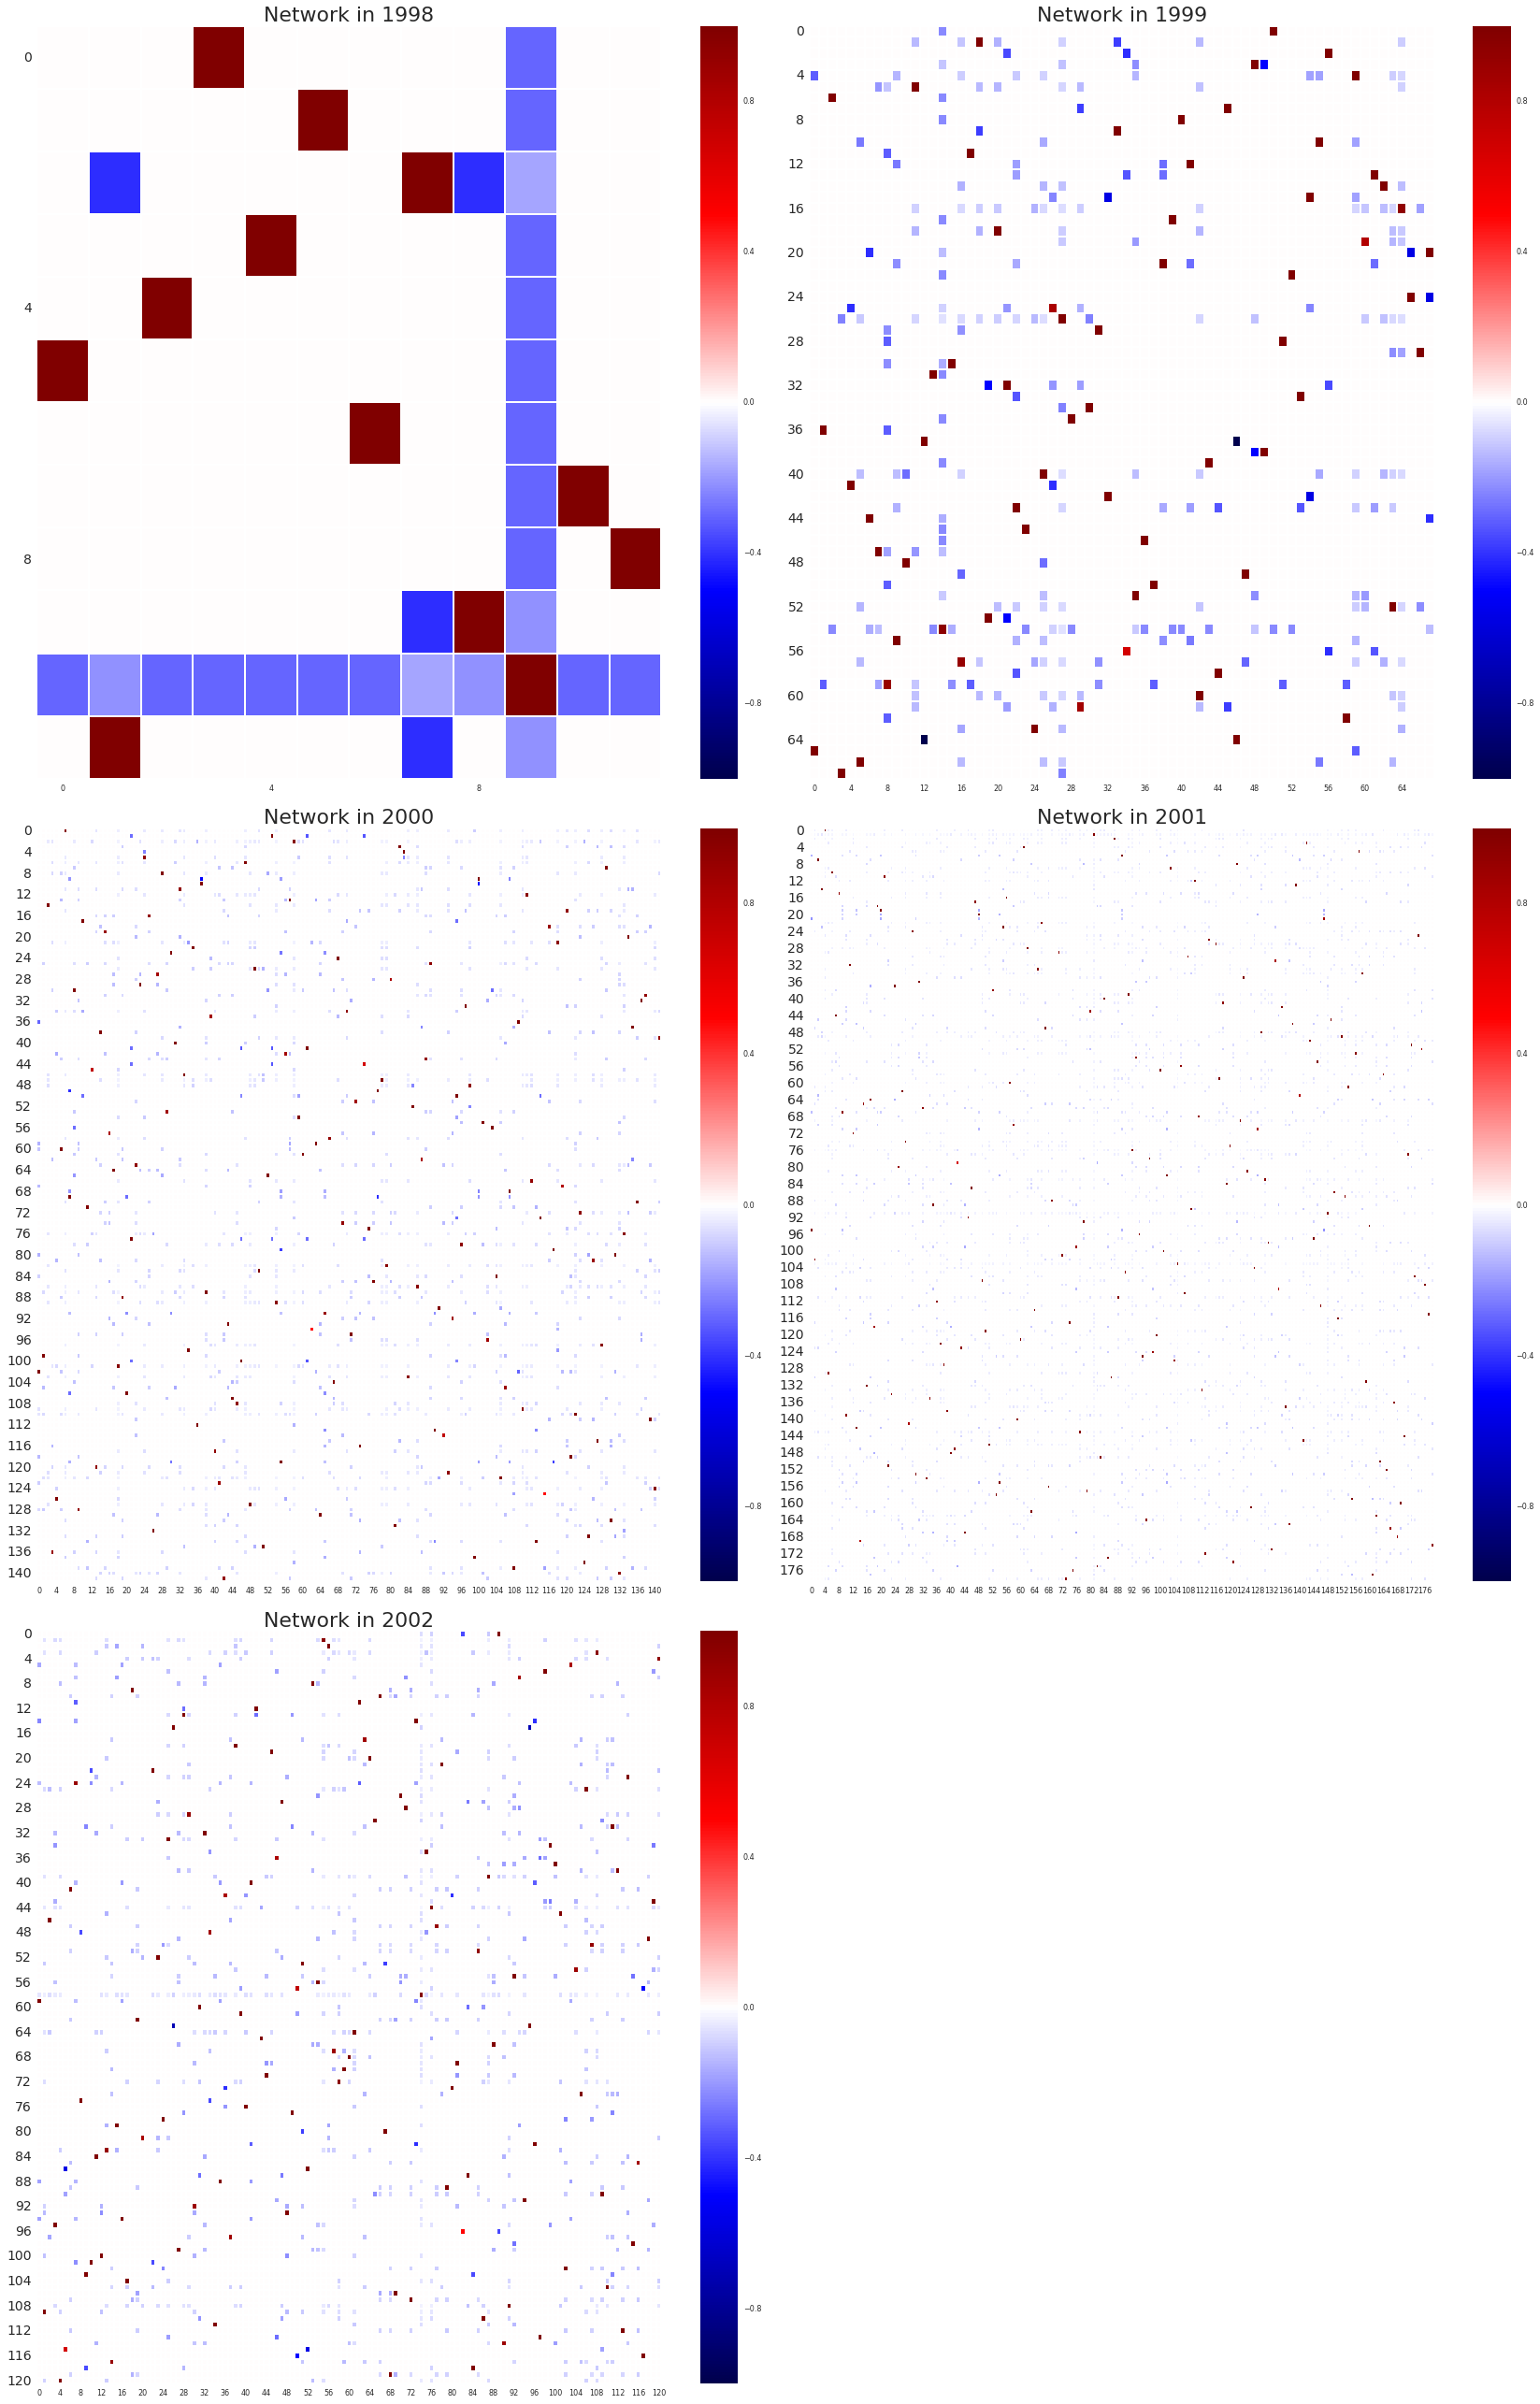

In [231]:
plt.figure(figsize=(24,36))
for i in range(len(all_year_G)):
    m = nx.normalized_laplacian_matrix(all_year_G[i]).todense()
    g = sns.clustermap(m)
    plt.close()
    ind = g.dendrogram_row.reordered_ind
    plt.subplot(3,2,i+1)
    sns.heatmap(m[ind][ind], cmap='seismic', linewidths=1, xticklabels=4,yticklabels=4)
    plt.title("Network in "  + str(years[i]), fontsize=22)
    plt.yticks(fontsize=14, rotation=360)
    plt.yticks(fontsize=14)
    plt.tight_layout()


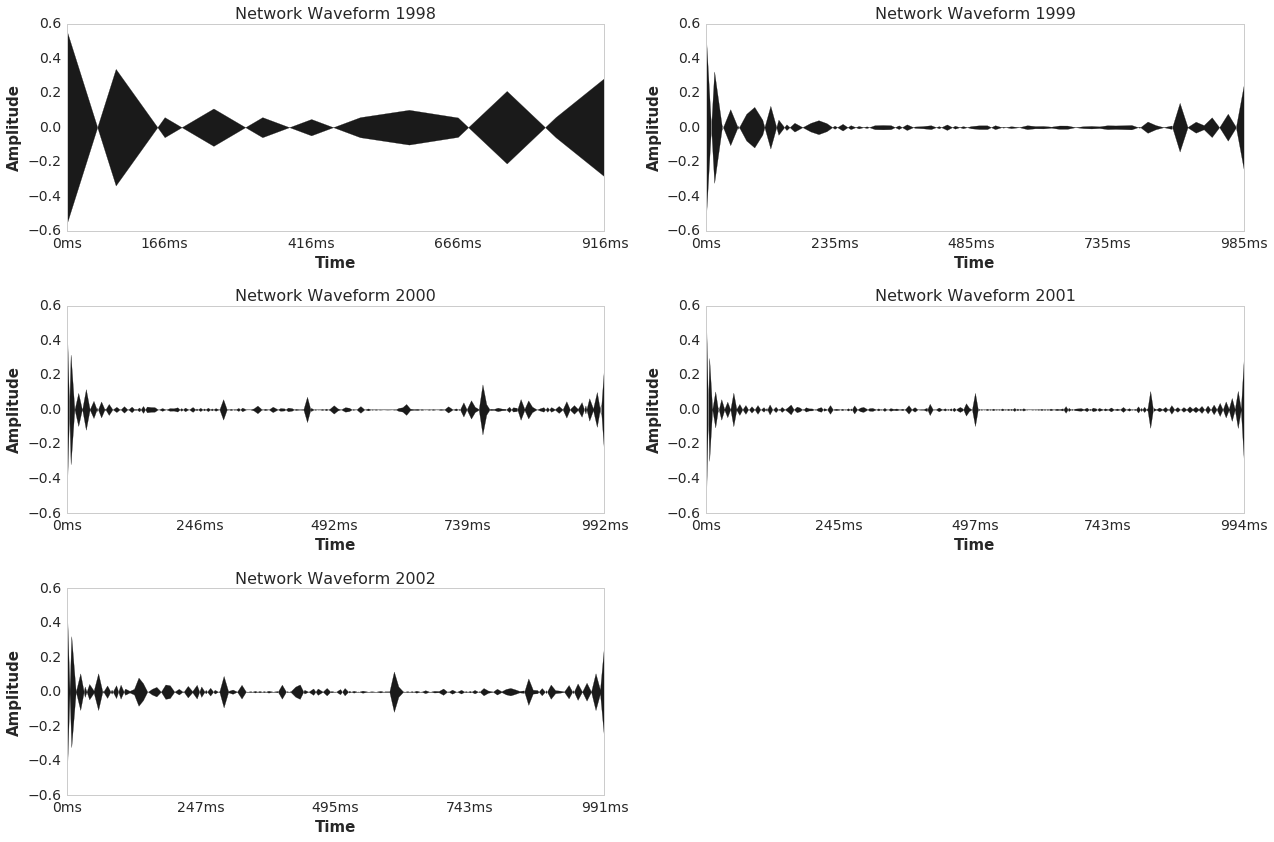

In [232]:
plt.figure(figsize=(18,12))
for i in range(len(all_year_G)):
    f = sc.fftpack.rfft(nx.normalized_laplacian_matrix(all_year_G[i]).todense()).mean(axis=1)
    fs = f.shape[0]

    plt.subplot(3,2,i+1)
    librosa.display.waveplot(f, fs,color='k')
    plt.title("Network Waveform " + str(years[i]), fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("Time", fontsize=15)
    plt.ylabel("Amplitude", fontsize=15)
    plt.grid(False)
    plt.tight_layout()

## Monthly networks

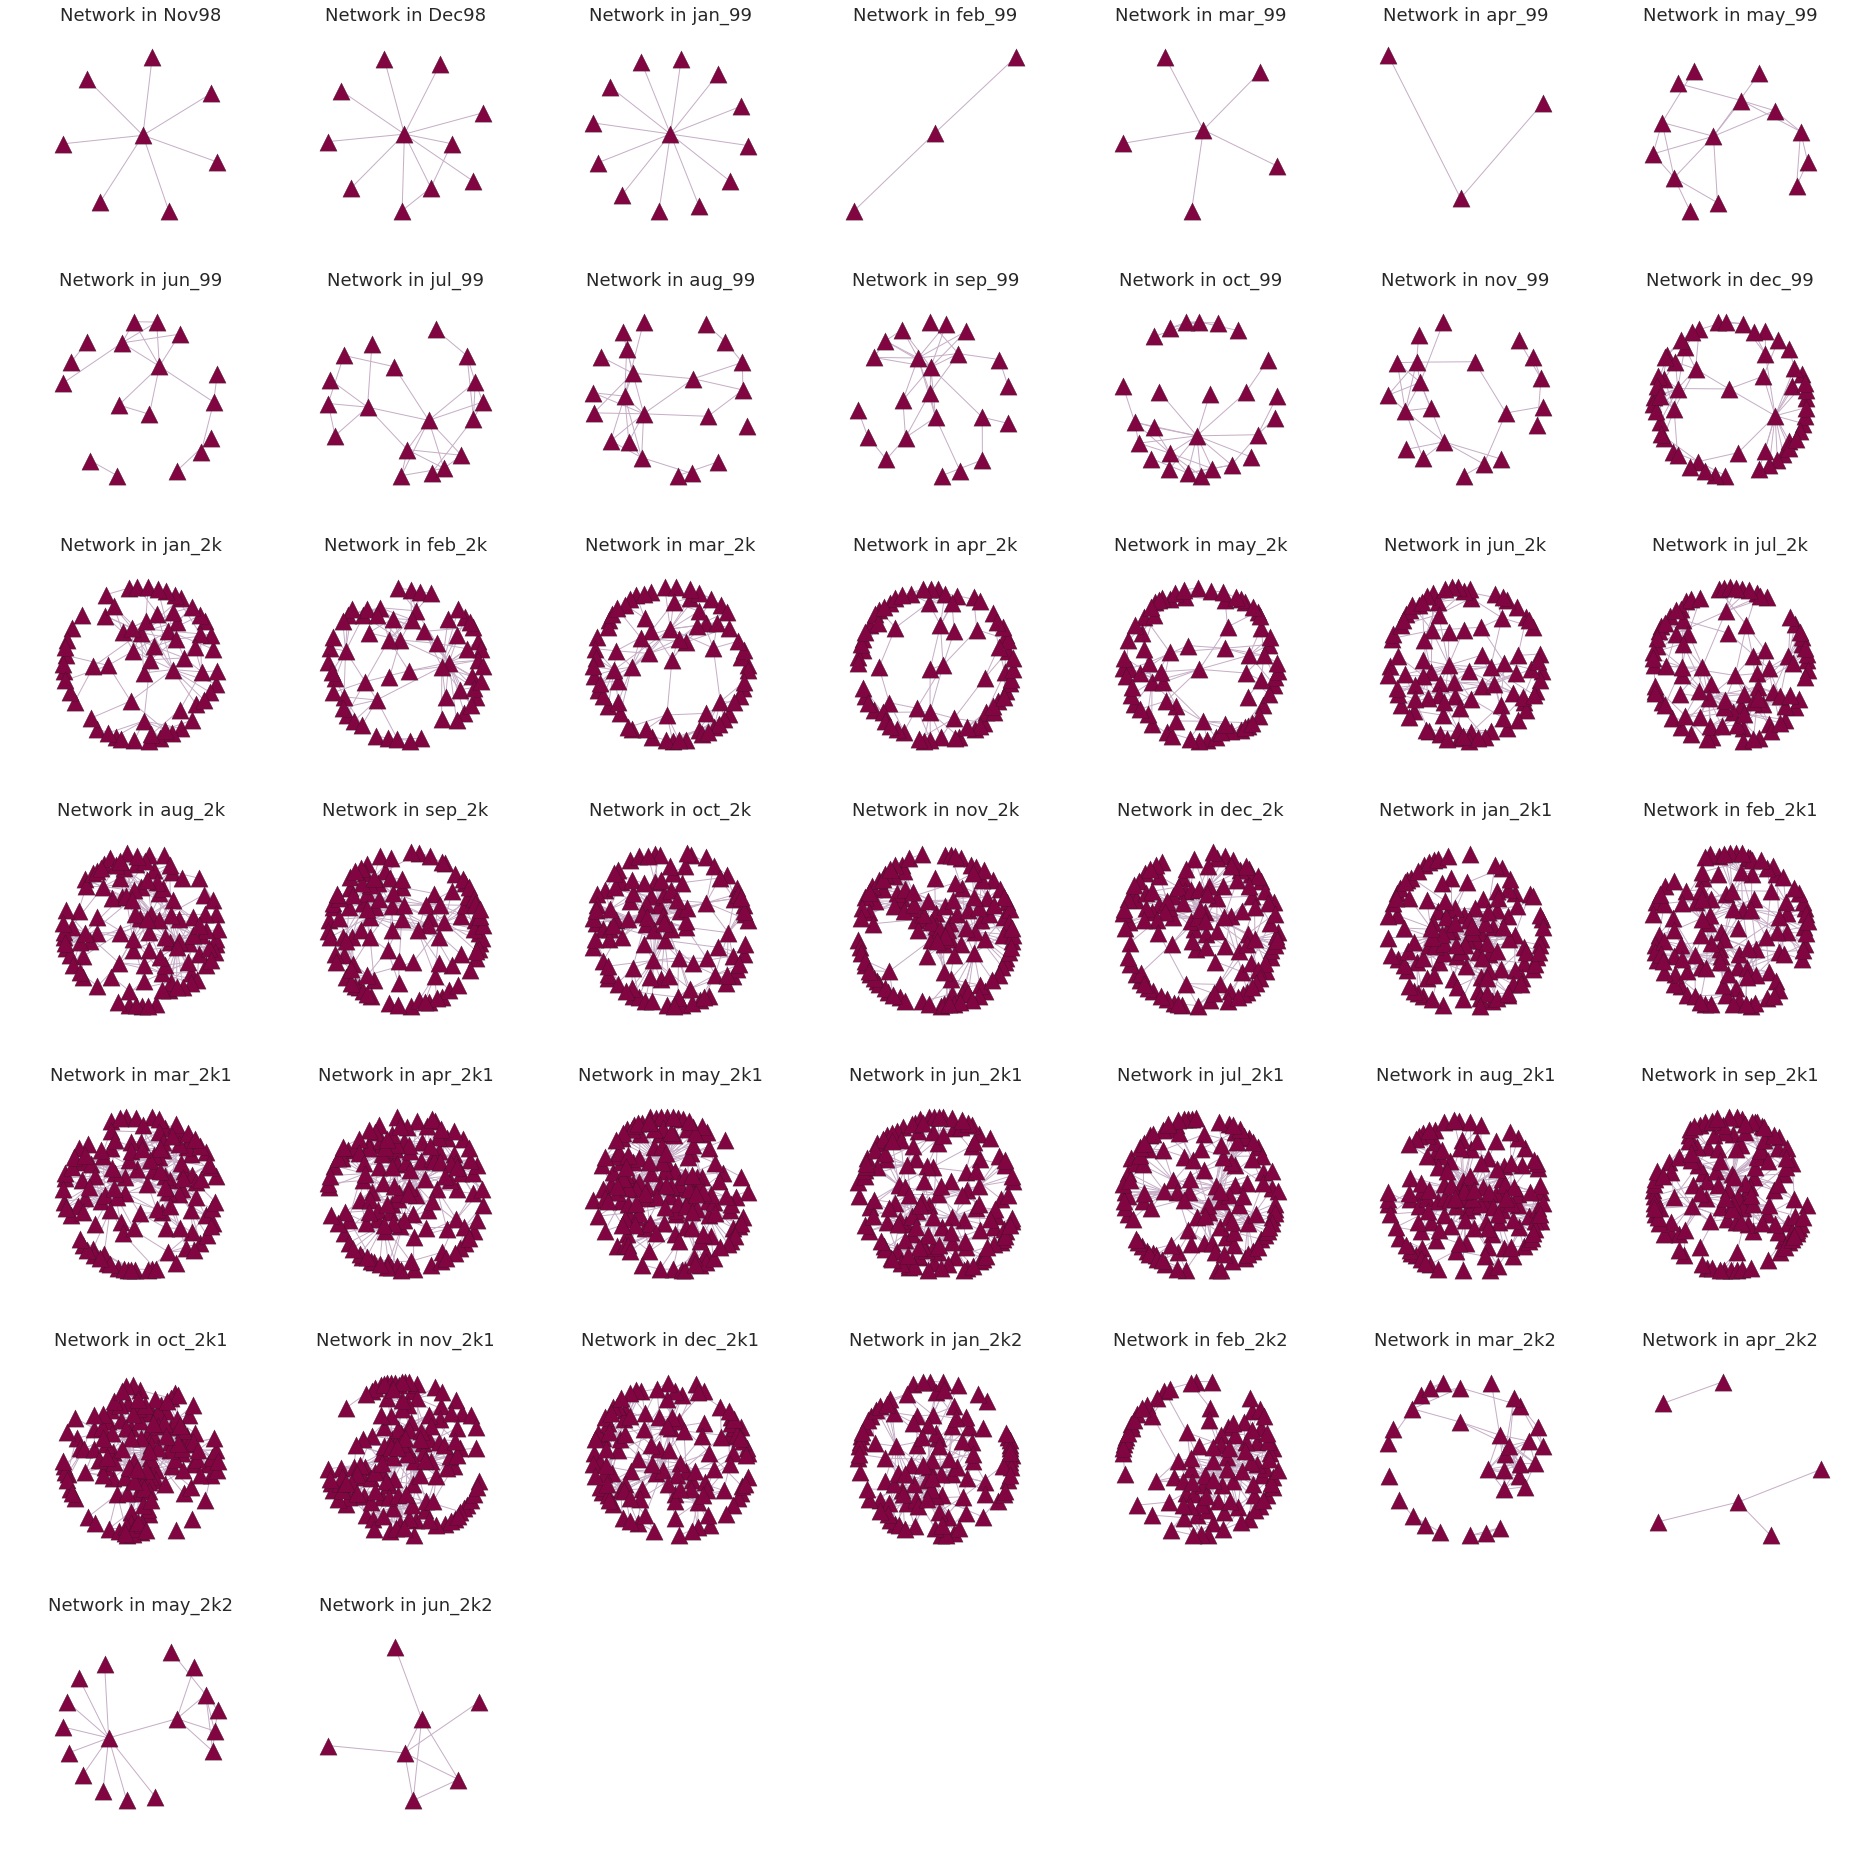

In [233]:
plt.figure(figsize=(26,26))
for i in range(len(all_month_G)):
    plt.subplot(7,7,i+1)
    nx.draw_spring(all_month_G[i],  node_color='#810541',node_shape='^',edge_color ='#C6AEC7')
    plt.title("Network in "  + str(months[i]), fontsize=18)
    plt.tight_layout()

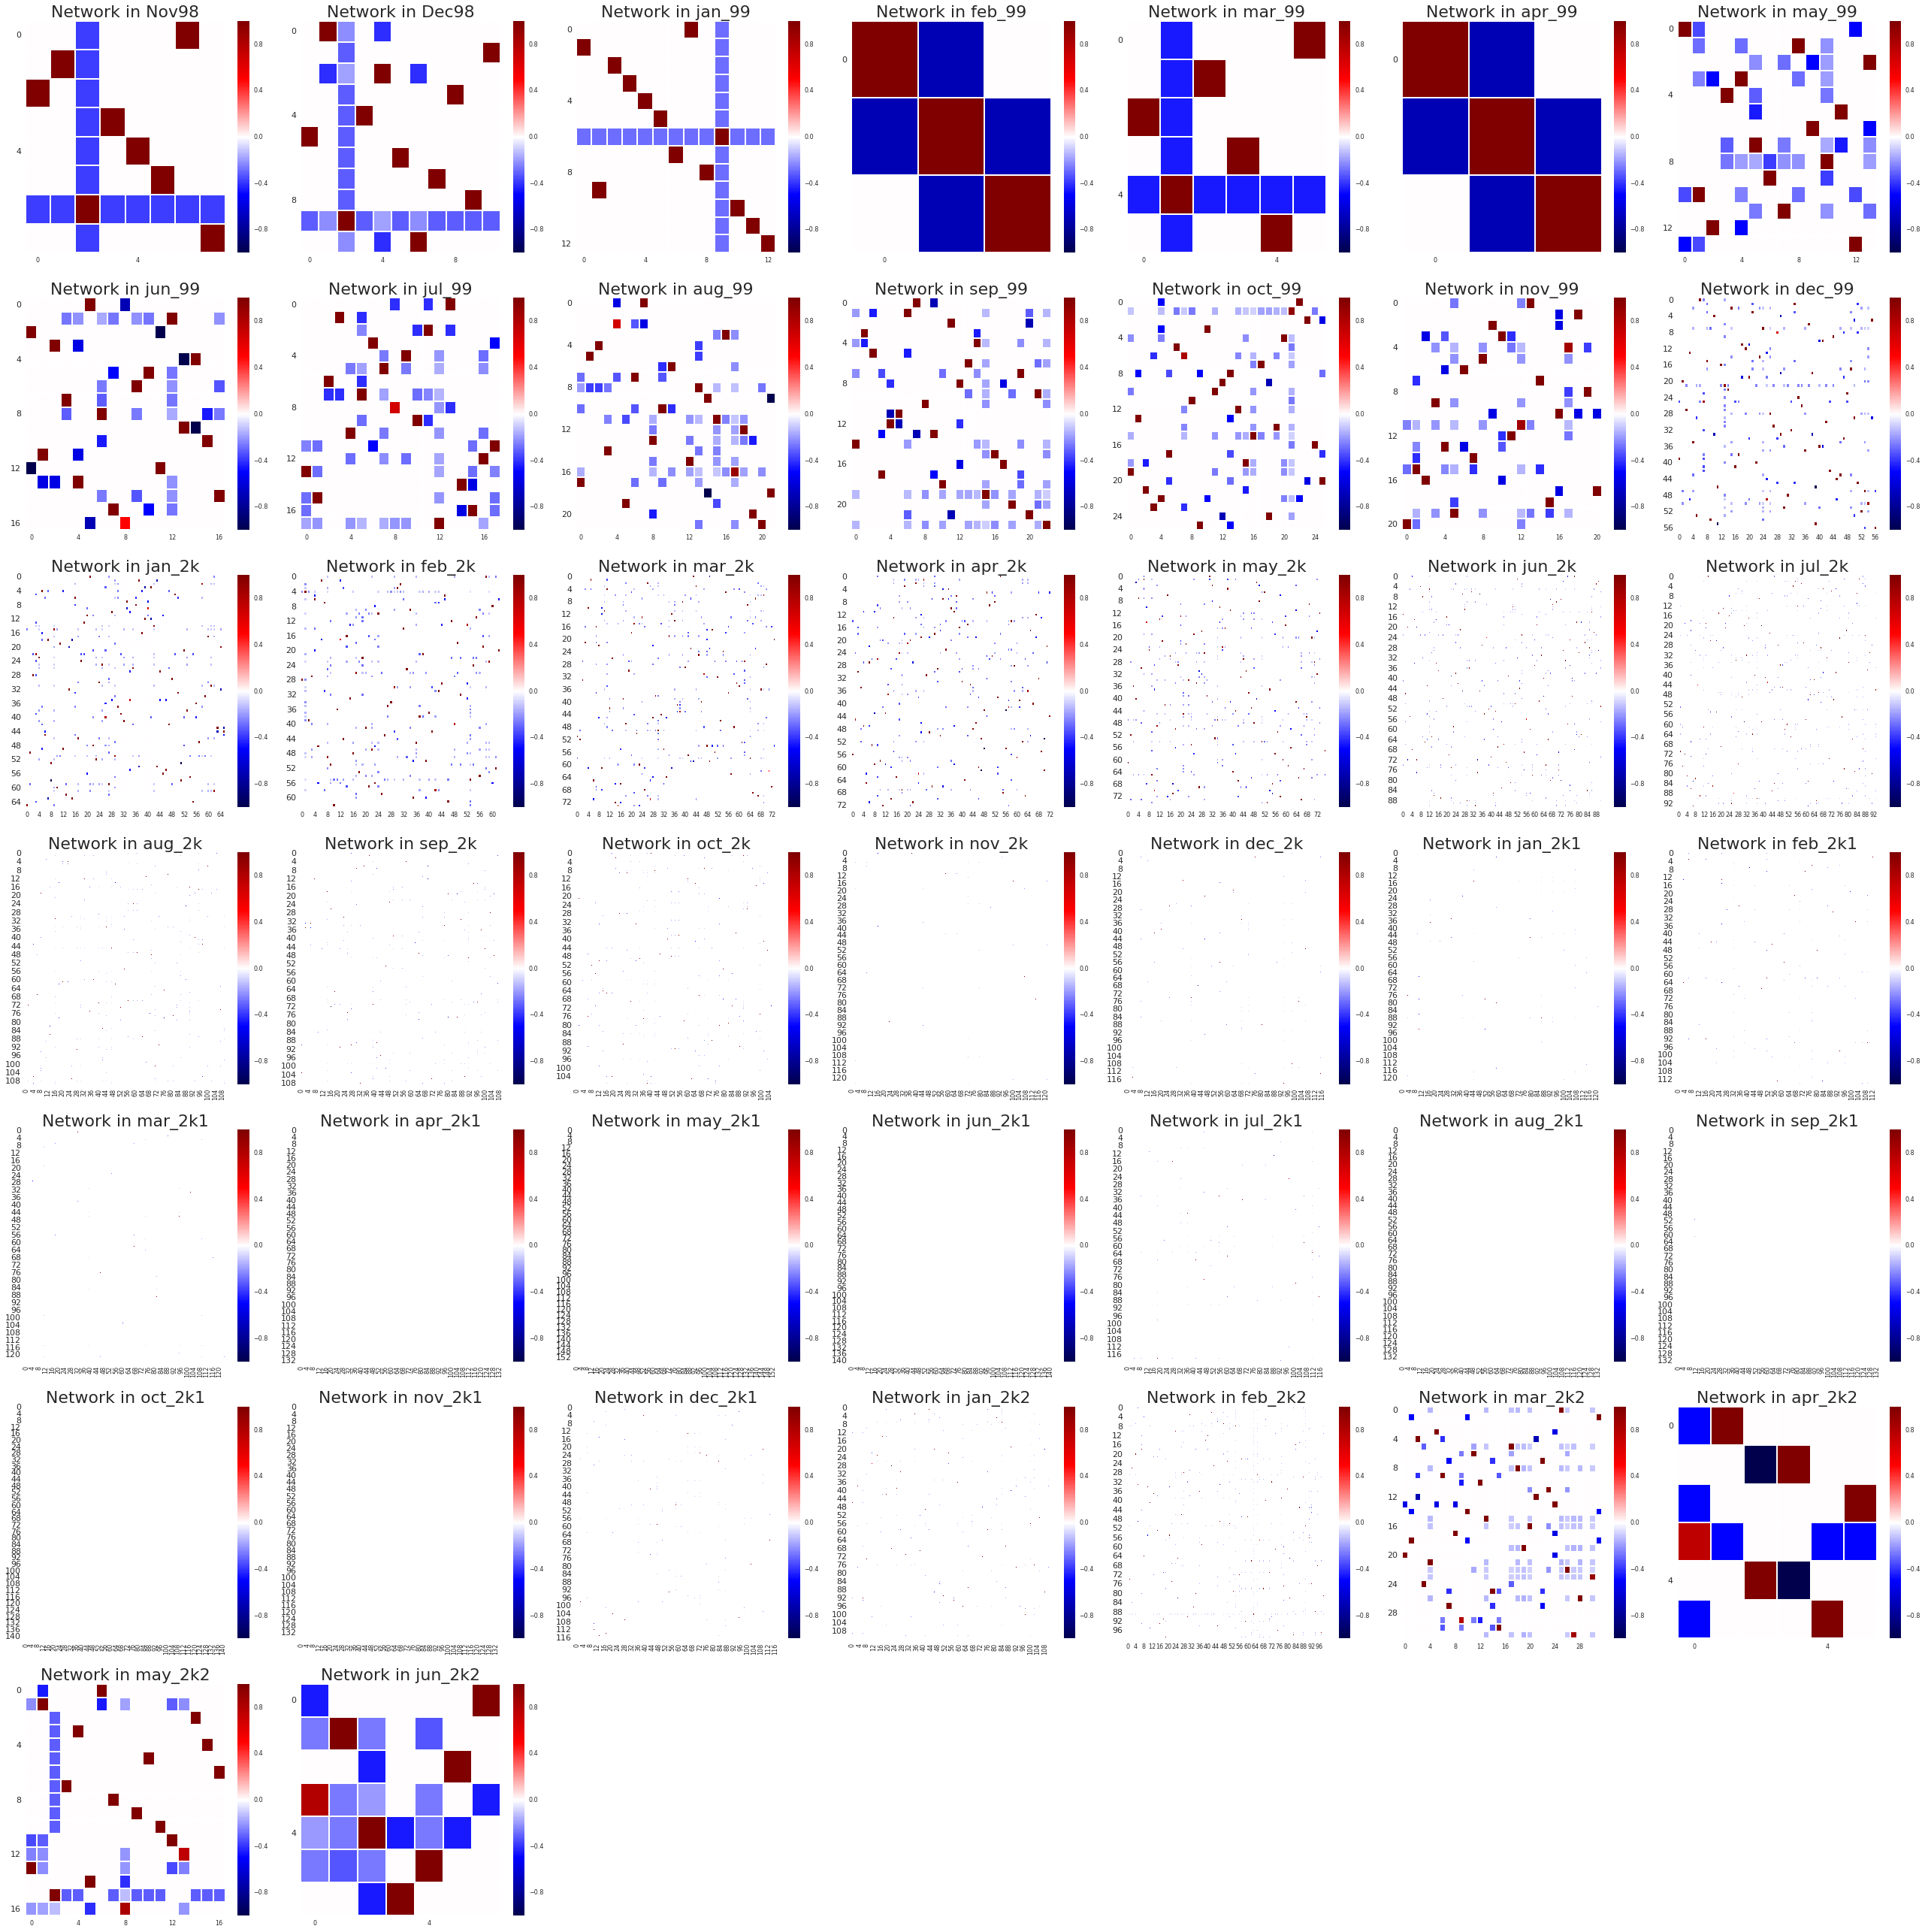

In [234]:
plt.figure(figsize=(36,36))
for i in range(len(all_month_G)):
    m = nx.normalized_laplacian_matrix(all_month_G[i]).todense()
    g = sns.clustermap(m)
    plt.close()
    ind = g.dendrogram_row.reordered_ind
    plt.subplot(7,7,i+1)
    sns.heatmap(m[ind][ind], cmap='seismic', linewidths=1, xticklabels=4,yticklabels=4)
    plt.title("Network in "  + str(months[i]), fontsize=22)
    plt.yticks(fontsize=11, rotation=360)
    plt.yticks(fontsize=11)
    plt.tight_layout()

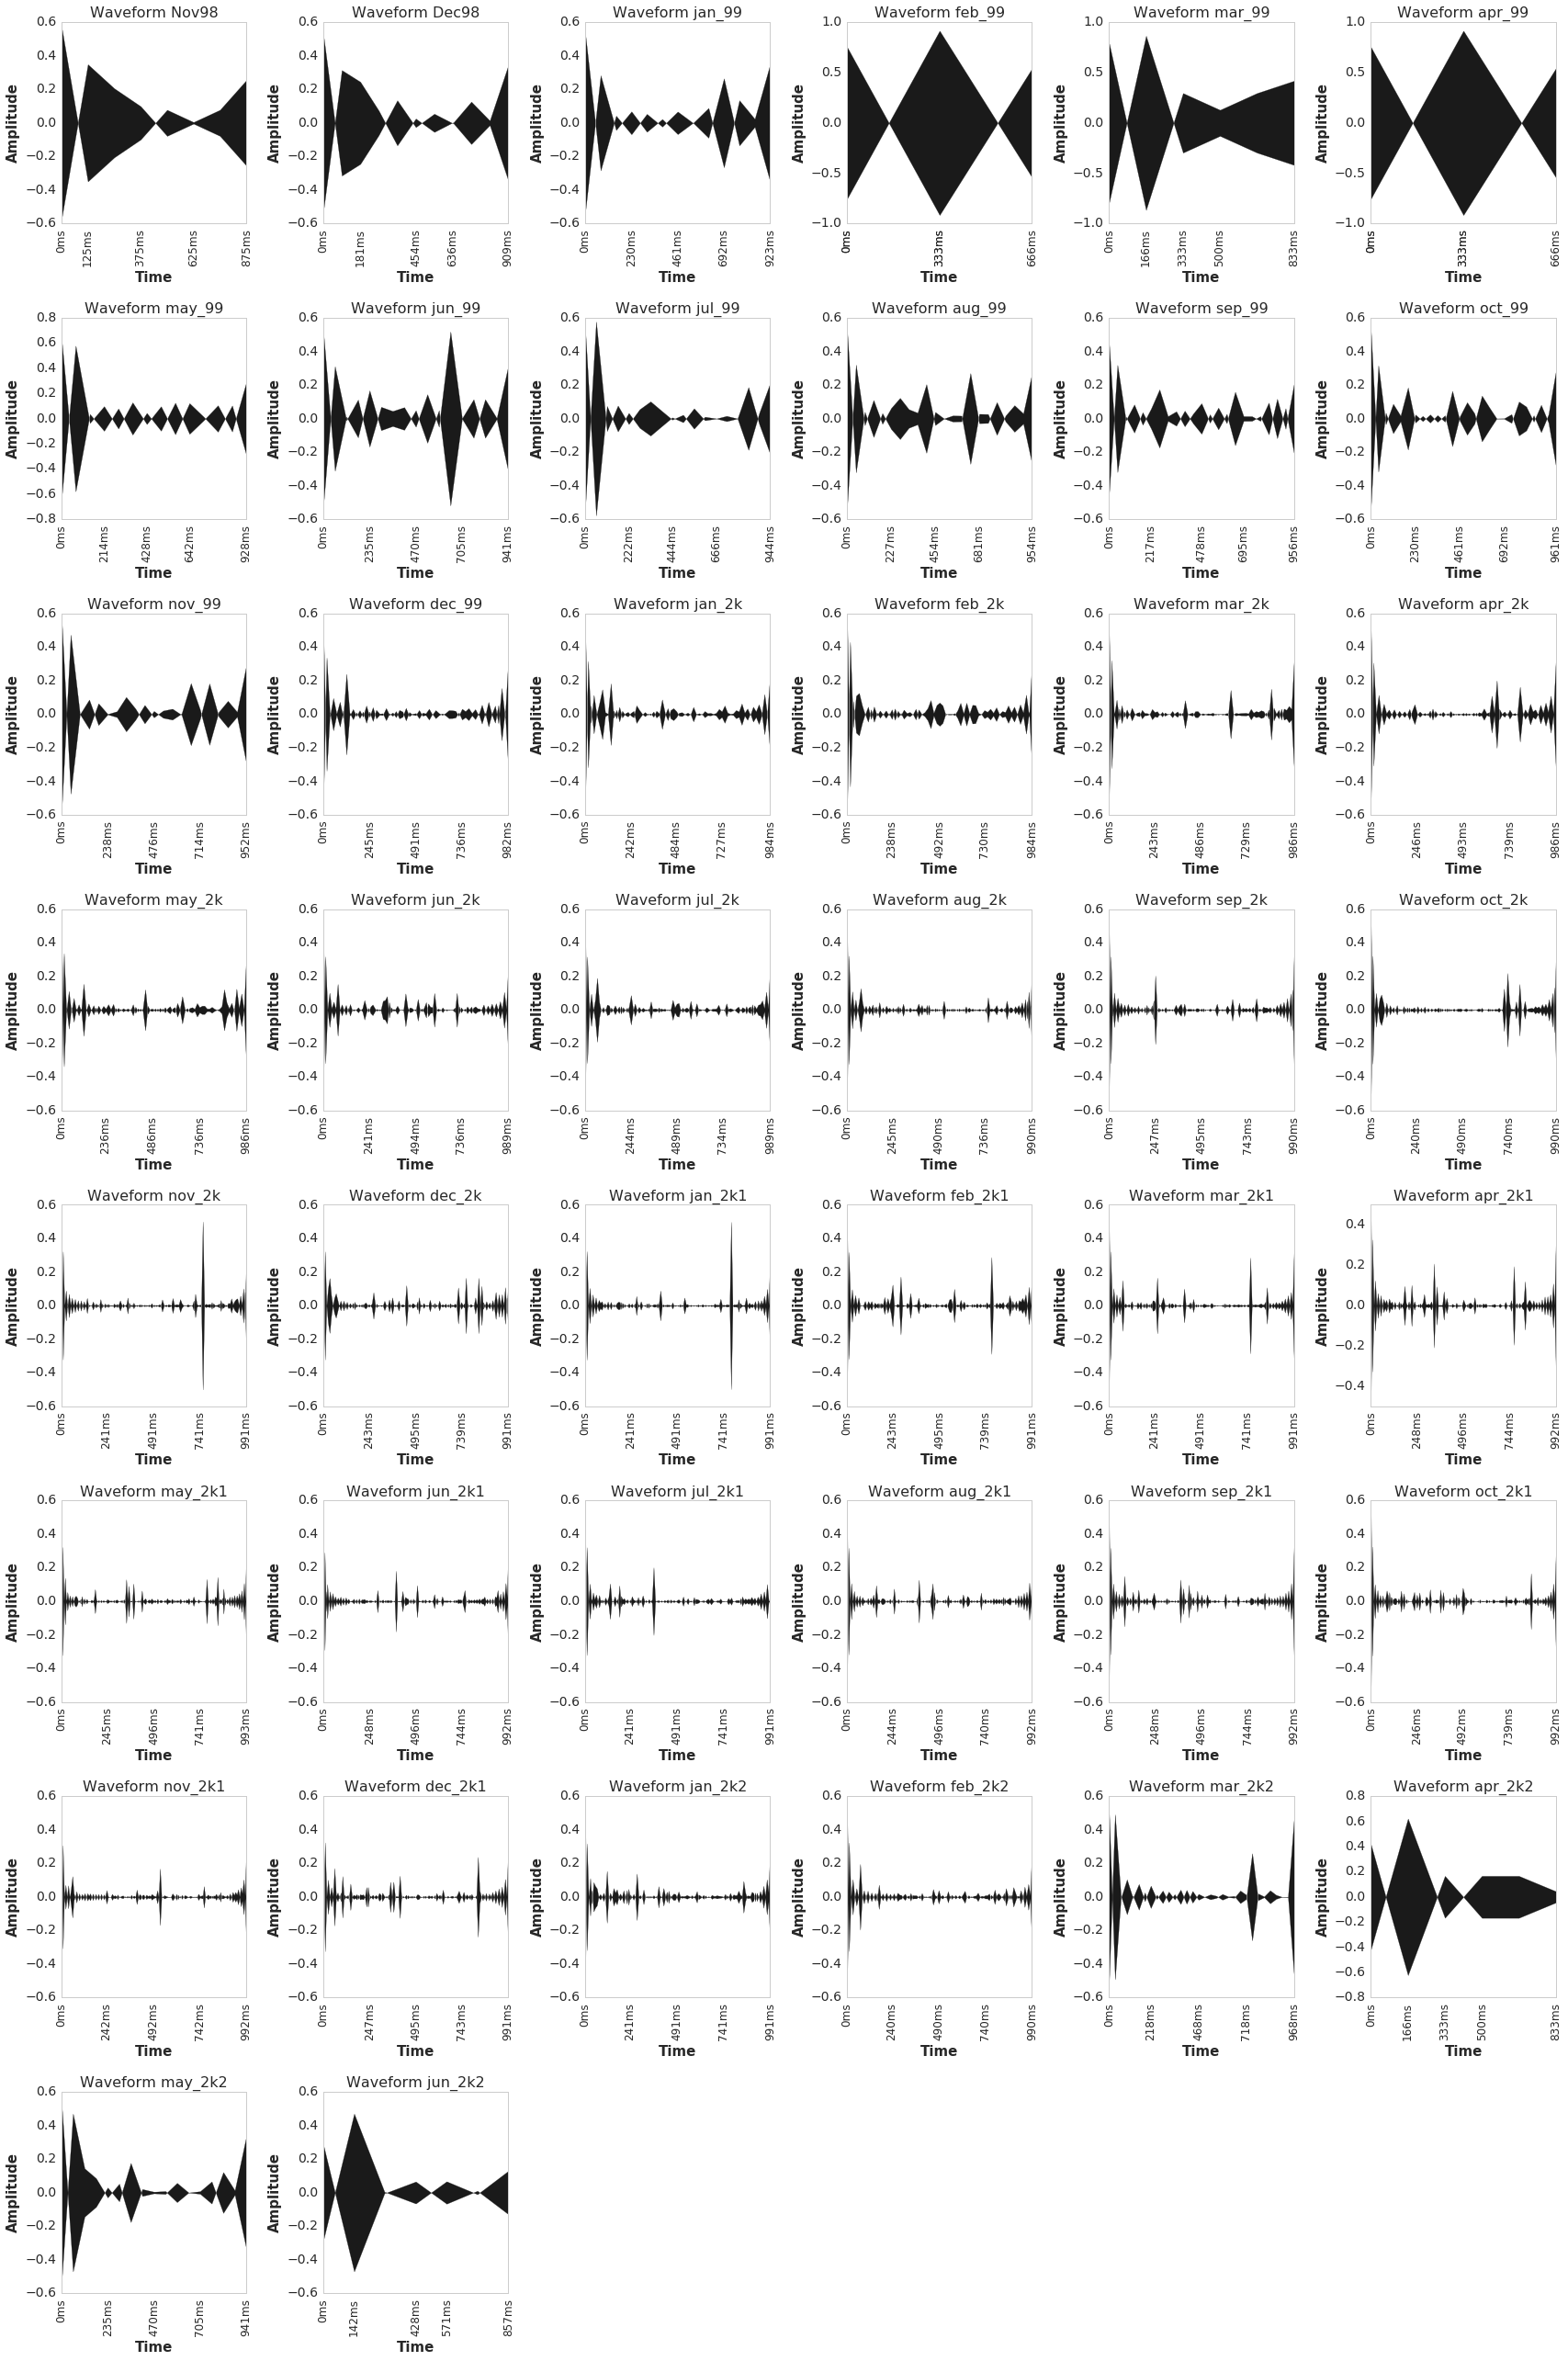

In [235]:
plt.figure(figsize=(24,36))

for i in range(len(all_month_G)):
    f = sc.fftpack.rfft(nx.normalized_laplacian_matrix(all_month_G[i]).todense()).mean(axis=1)
    fs = f.shape[0]
   
    plt.subplot(8, 6, i+1)
    librosa.display.waveplot(f, fs,color='k')
    plt.title("Waveform " + str(months[i]), fontsize=16)
    plt.xticks(fontsize=12, rotation=90)
    plt.yticks(fontsize=14)
    plt.xlabel("Time", fontsize=15)
    plt.ylabel("Amplitude", fontsize=15)
    plt.grid(False)
    plt.tight_layout()

# Attribute Analysis

## Traditional Measures

### Centrality
- Degree
- Betweeness
- Closeness
- Katz
- Load

### Assortativity & Linear Algebra
- Density
- Average Clustering Coefficient
- Algebraic Connectivity

## Complex Trace Attributes

- Instantaneous Amplitude
- Instantaneous Frequency
- Instantaneous Phase
- Derivative of Amplitude
- Second Derivative of Amplitude
- Power
- Cosine of Instantaneous Phase
- Amplitude weighted Frequency
- Amplitude weighted Phase
- Power Spectral Density

## Matrix /Matrix Decomposition

- Resistance Distance
- Stationarity Ratio
- Subgraph Stationarity
- KLPCA Ratio Change
- Norm NMF Ratio Change
- Curvature

## Music Attributes
- Zero Crossing Rate
- Spectral Centroid

## Aggregation Measures
- Persistence
- Emergence
- NRMS of Attributes



In [236]:
def calc_seisatt(net):
    M = nx.normalized_laplacian_matrix(net).todense()
    Ht = hilbert(M)  
    rHt = np.real(Ht)
    iHt = np.imag(Ht)
    
    #Basic attributes IA, IP, IF
    IA = np.real(np.nan_to_num(np.sqrt(np.dot(rHt,rHt)+np.dot(iHt,iHt))))
    IP = np.real(np.nan_to_num(np.arctan(iHt/rHt)))
    IF,_ = np.real(np.nan_to_num(np.asarray(np.gradient(IP))))
    P = np.square(IA)
    
    #Derivatives 
    dIA,_ = np.nan_to_num(np.asarray(np.gradient(IA)))
    d2IA,_ = np.nan_to_num(np.asarray(np.gradient(dIA)))
    IAcc,_ =np.nan_to_num(np.asarray(np.gradient(IF)))
   
    #Derived Attributes
    cosIP = np.cos(IP)
    IA_weit_IF = IA * IF
    IA_weit_IP = IA*IP

    return [IA,IP,IF,P, dIA,d2IA, IAcc,cosIP,IA_weit_IF,IA_weit_IP]

In [237]:
def stationarity_ratio(G):
    #stationarity ratio with laplian
    L = nx.normalized_laplacian_matrix(G).todense()
    U = eigvals(L)
    C =np.cov(L)
    CF = np.dot(L,np.dot(np.dot(U.T,C),U))
    r = np.linalg.norm(np.diag(CF))/np.linalg.norm(CF)
       
    return r

In [238]:
#cite:`klein1993resistance`
def resistance_distance(net):  
    M = nx.normalized_laplacian_matrix(net).todense()
    pseudo = pinv(M)
    N = M.shape[0]
    d = np.diag(pseudo)
    rd  = np.kron(d,np.ones((N,1))).T+np.kron(d,np.ones((N,1))).T - pseudo - pseudo.T
    
    return rd.mean()

In [239]:
def curvature(net):
    from skimage.feature import hessian_matrix, hessian_matrix_det, hessian_matrix_eigvals
    M = nx.normalized_laplacian_matrix(net).todense()
    M = np.float64(M)
    fx, fy = np.gradient(M)
    Hxx, Hxy, Hyy = hessian_matrix(M)
    K = np.divide((np.dot(Hxx,Hxy)-np.dot(Hxy,Hxy)),\
                  (1+np.dot(fx,fx)+np.dot(fy,fy)))   
    He1,_ = hessian_matrix_eigvals(Hxx,Hxy,Hyy)
    mean_curv = np.trace(He1)
   
    return mean_curv

In [240]:
def kpca_ratio(net):
    from sklearn.decomposition import KernelPCA
    kpca = KernelPCA(n_components=3,kernel='rbf')
    m = nx.normalized_laplacian_matrix(net).todense()
    X_kpca = kpca.fit_transform(m)
    pc1 = X_kpca[:,0]
    pc2 = X_kpca[:,1]
    pc3 = X_kpca[:,2]
    kpca_rat = norm(pc1-pc3/(pc1-pc2)) 
    return kpca_rat

In [241]:
def kpca_att(net):
    kpca_chg = []
    for i in range(len(net)-1):
        x = int(i)
        y = 1+x
        kpcar1= kpca_ratio(net[x])
        kpcar2= kpca_ratio(net[y])
        kpca_chg.append(np.divide(kpcar2,kpcar1))
    kpca_chgpad = np.zeros(len(kpca_chg)+1);
    kpca_chgpad[1:] = kpca_chg   
    
    return kpca_chgpad

In [242]:
def nmf_att(net):
    nmf_chg = []
    
    nmf = NMF(init='nndsvda',solver='cd', random_state=0, l1_ratio=1)
    for i in range(len(net)-1):
        x = int(i)
        y = 1+x
        m1= abs(nx.normalized_laplacian_matrix(net[x]).todense())
        m2= abs(nx.normalized_laplacian_matrix(net[y]).todense())
        nmf1 = norm(nmf.fit_transform(m1))
        nmf2 = norm(nmf.fit_transform(m2))
        nmf_chg.append(np.divide(nmf2,nmf1))
    nmf_chgpad = np.zeros(len(nmf_chg)+1);
    nmf_chgpad[1:] = nmf_chg   
    
    return nmf_chgpad

In [243]:
def pad_shape(x,ref,offset=0):
    result = np.zeros_like(ref)
    result[0:x.shape[0]+0,0:x.shape[1]+0] = x
    
    return result

def subgraph_stat(net1,net2):
    net1_int_net2 = net1.copy()
    net1_int_net2.remove_nodes_from(n for n in net1 if n not in net2)
    net1_u_net2 = nx.disjoint_union(net1, net2)
    int_adjmat = nx.normalized_laplacian_matrix(net1_int_net2).todense()
    uni_adjmat = nx.normalized_laplacian_matrix(net1_u_net2).todense()
    int_adjmat_pad = pad_shape(int_adjmat,uni_adjmat)
    
    Ct = np.divide(norm(int_adjmat_pad),norm(uni_adjmat))
    
    return Ct

def zeta(n):
       
    Ct_m = []
    for i in range(len(n)-1):
        x = int(i)
        y = x +1
        Ct_m.append(subgraph_stat(n[x],n[y]))
    Ct_m_pad = np.zeros(len(Ct_m)+1);
    Ct_m_pad[1:] = Ct_m
    return Ct_m_pad

In [281]:
def cal_avg_atts(x):
    
    #define attributes placeholders here
    deg_y = []
    bet_y = []
    clo_y = []
    load_y = []
    katz_y = []
    den_y = []
    algc_y = []
    cluscof_y = []
    IA_y = []
    IP_y = [] 
    IF_y = []
    P_y = []
    dIA_y = []
    d2IA_y =[] 
    IAcc_y = []
    cosIP_y = []
    IA_weit_IF_y = []
    IA_weit_IP_y = []
    psd_y = []    
    rd_y = []    
    zcr_y = []
    spc_y = []
    statr_y = []   
    meank_y = []
    
    #matrix decompostion attributes
    zeta_y = zeta(x)
    nmf_ratio_y = nmf_att(x)
    kpca_chg_y= kpca_att(x)
    prop_members_chg_1_zeta = 1-zeta_y
    
    for n in x:
        deg = np.mean(sorted(set(nx.degree_centrality(n).values())))
        bet = np.mean(sorted(set(nx.betweenness_centrality(n).values())))
        clo = np.mean(sorted(set(nx.closeness_centrality(n).values())))
        katz = deg = np.mean(sorted(set(nx.katz_centrality_numpy(n).values())))
        load = np.mean(sorted(set(nx.degree_centrality(n).values())))
        den = nx.density(n)
        algc = nx.algebraic_connectivity(n)
        clustcof = nx.average_clustering(n)

        #all network metrics
        deg_y.append(deg), bet_y.append(bet), clo_y.append(clo), load_y.append(load), katz_y.append(katz), \
        den_y.append(den),  algc_y.append(algc), cluscof_y.append(clustcof)

        #complex trace attributes
        IA,IP,IF,P, dIA,d2IA, IAcc,cosIP,IA_weit_IF,IA_weit_IP = calc_seisatt(n)
        IA_y.append(IA.mean())
        IP_y.append(IP.mean())
        IF_y.append(IF.mean())
        P_y.append(P.mean())
        dIA_y.append(dIA.mean())
        d2IA_y.append(d2IA.mean()) 
        IAcc_y.append(IAcc.mean())
        cosIP_y.append(cosIP.mean())
        IA_weit_IF_y.append(IA_weit_IF.mean())
        IA_weit_IP_y.append(IA_weit_IP.mean())

        psd, _ = plt.psd(nx.laplacian_matrix(n).todense());
        plt.close()
        psd_y.append(psd.mean())

        #music attributes
        f = sc.fftpack.rfft(nx.normalized_laplacian_matrix(n).todense()).mean(axis=1)
        zcr = librosa.feature.zero_crossing_rate(f)[0,0]
        spc = librosa.feature.spectral_centroid(f)[0,0]
        zcr_y.append(zcr)
        spc_y.append(np.log10(spc))

        #matrix attributes
        rdm = resistance_distance(n)
        rd_y.append(rdm)

        statrat = stationarity_ratio(n)
        statr_y.append(statrat)

        meank = curvature(n)
        meank_y.append(meank)
        


    colnames = ['AvgDeg','AvgBet','AvgClo','AvgLoad','AvgKatz','AvgDensity','AvgAlgCon','AvgClustCoff',''\
                'InstAmp','InstPhase','InstFreq','Power','dInstAmp','d2InstAmp','InstAcc','cosInstPhase',\
               'A_wt_IF','A_wt_IP','PowerSpecDen','ResDist','ZeroCrossRate','LogSpecCentroid','StatRat','MeanCurv']

    attvol_y = pd.DataFrame([deg_y,bet_y, clo_y ,load_y ,katz_y ,den_y, algc_y ,cluscof_y ,IA_y ,IP_y , IF_y,\
                 P_y ,dIA_y ,d2IA_y,IAcc_y ,cosIP_y ,IA_weit_IF_y ,IA_weit_IP_y ,psd_y ,rd_y, zcr_y ,spc_y,\
                 statr_y , meank_y]).T

    attvol_y.columns = colnames
    attvol_y['SubgraphStat']=zeta_y
    attvol_y['1-Zeta'] = prop_members_chg_1_zeta
    attvol_y['LogKPCARatioChg'] = np.log10(kpca_chg_y)
    attvol_y.LogKPCARatioChg[0]=0
    attvol_y['NormNMFRatioChg']= nmf_ratio_y
    attvol_y_sc = attvol_y.apply(lambda x: minmax_scale(x, feature_range=[-1,1]))

    return attvol_y_sc


In [282]:
attvol_y = cal_avg_atts(all_year_G)

In [283]:
attvol_m = cal_avg_atts(all_month_G)

# Overview Plots

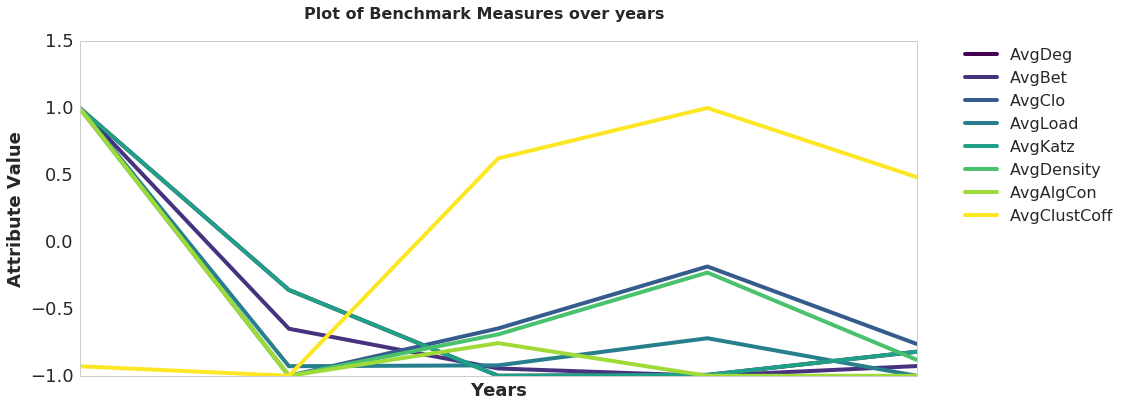

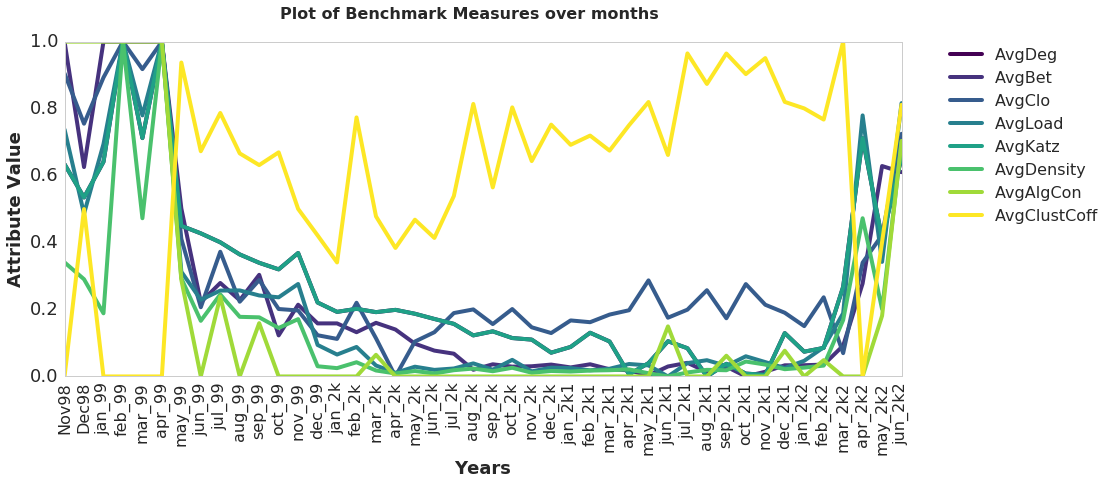

In [284]:
attvol_y.iloc[:,:8].plot.line(use_index=True,cmap='viridis')
plt.xlabel("Years", fontsize=18)
plt.ylabel("Attribute Value", fontsize=18)
plt.legend(fontsize=16, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(years,[i for i in years],fontsize=18)
plt.yticks(fontsize=18)
plt.suptitle("Plot of Benchmark Measures over years", fontsize=16)
plt.autoscale()

attvol_m_sc.iloc[:,:8].plot.line(use_index=True,cmap='viridis', rot=90)
plt.xlabel("Years", fontsize=18)
plt.ylabel("Attribute Value", fontsize=18)
plt.legend(fontsize=16, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(np.arange(len(months)), months,fontsize=16)
plt.yticks(fontsize=18)
plt.suptitle("Plot of Benchmark Measures over months", fontsize=16)
plt.autoscale()

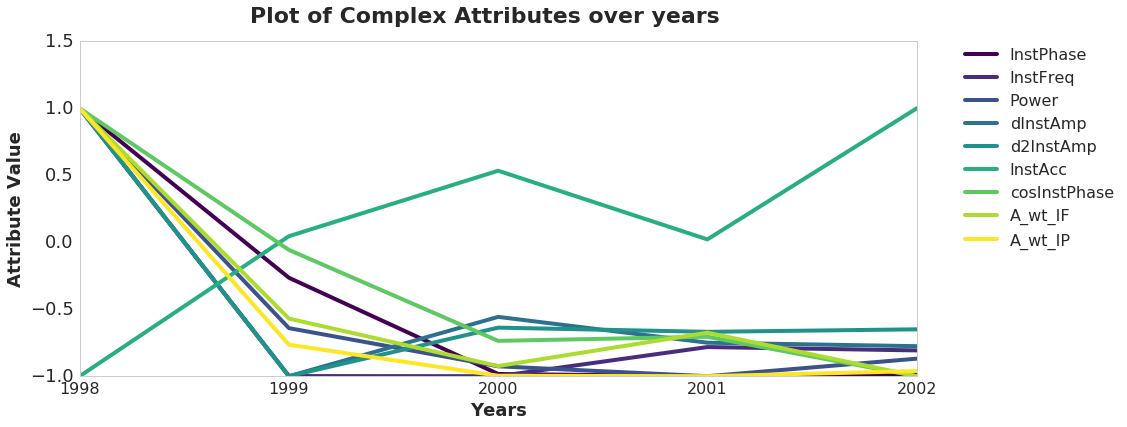

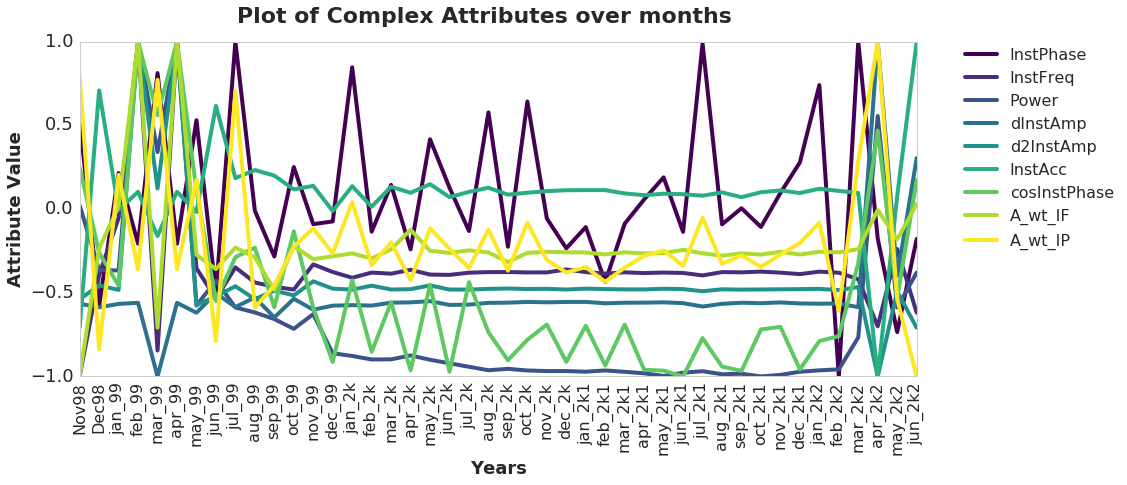

In [285]:
attvol_y.iloc[:,9:18].plot.line(use_index=True,cmap='viridis')
plt.xlabel("Years", fontsize=18)
plt.ylabel("Attribute Value", fontsize=18)
plt.legend(fontsize=16, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(np.arange(len(years)), years,fontsize=16)
plt.yticks(fontsize=18)
plt.suptitle("Plot of Complex Attributes over years", fontsize=22)
plt.autoscale()

attvol_m.iloc[:,9:18].plot.line(use_index=True,cmap='viridis', rot=90)
plt.xlabel("Years", fontsize=18)
plt.ylabel("Attribute Value", fontsize=18)
plt.legend(fontsize=16, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(np.arange(len(months)), months,fontsize=16)
plt.yticks(fontsize=18)
plt.suptitle("Plot of Complex Attributes over months", fontsize=22)
plt.autoscale()

(array([-1. , -0.5,  0. ,  0.5,  1. ]), <a list of 5 Text yticklabel objects>)

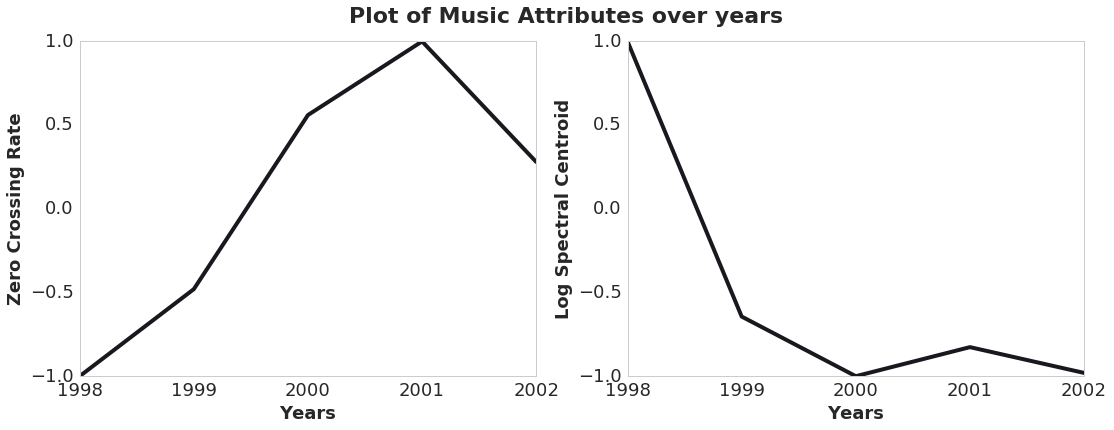

In [286]:
plt.figure(figsize=(18,6))
plt.suptitle("Plot of Music Attributes over years", fontsize=22)
plt.subplot(1,2,1)
plt.plot(attvol_y.ZeroCrossRate)
plt.xlabel("Years", fontsize=18)
plt.ylabel("Zero Crossing Rate", fontsize=18)
plt.xticks(np.arange(len(years)),years,fontsize=18)
plt.yticks(fontsize=18)
plt.autoscale()

plt.subplot(1,2,2)
plt.plot(attvol_y.LogSpecCentroid)
plt.xlabel("Years", fontsize=18)
plt.ylabel("Log Spectral Centroid", fontsize=18)
plt.xticks(np.arange(len(years)),years,fontsize=18)
plt.yticks(fontsize=18)


(array([-1. , -0.5,  0. ,  0.5,  1. ]), <a list of 5 Text yticklabel objects>)

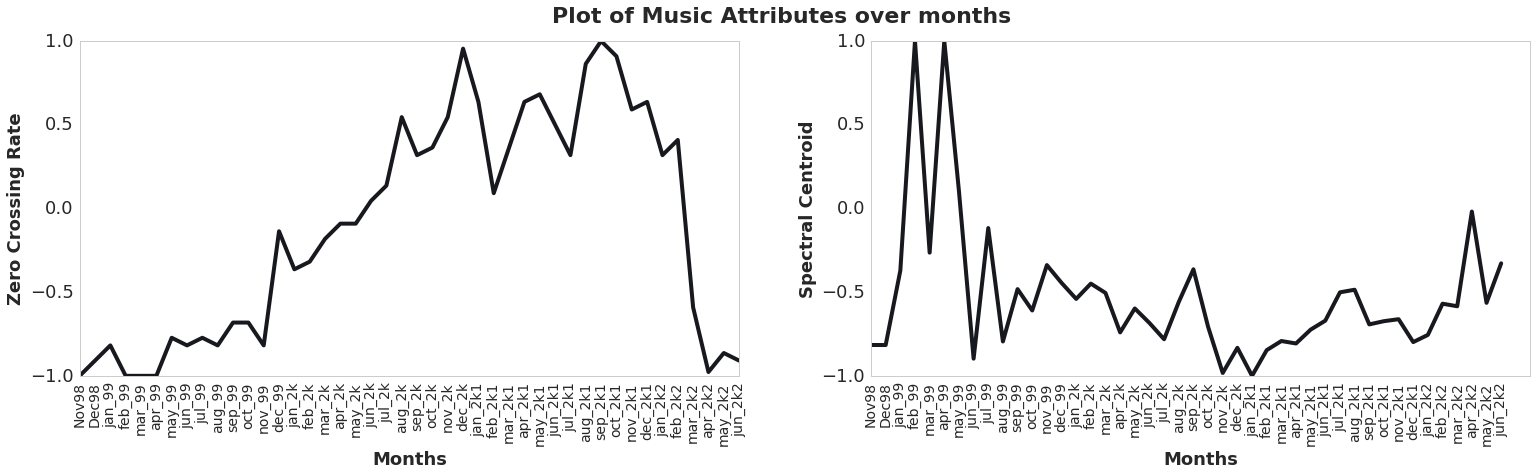

In [287]:
plt.figure(figsize=(26,6))
plt.suptitle("Plot of Music Attributes over months", fontsize=22)
plt.subplot(1,2,1)
plt.plot(attvol_m.ZeroCrossRate.values)
plt.xlabel("Months", fontsize=18)
plt.ylabel("Zero Crossing Rate", fontsize=18)
plt.xticks(np.arange(len(months)), months,fontsize=14, rotation=90)
plt.yticks(fontsize=18)
plt.autoscale()

plt.subplot(1,2,2)
plt.plot(attvol_m.LogSpecCentroid.values)
plt.xlabel("Months", fontsize=18)
plt.ylabel("Spectral Centroid", fontsize=18)
plt.xticks(np.arange(len(months)), months,fontsize=14, rotation=90)
plt.yticks(fontsize=18)

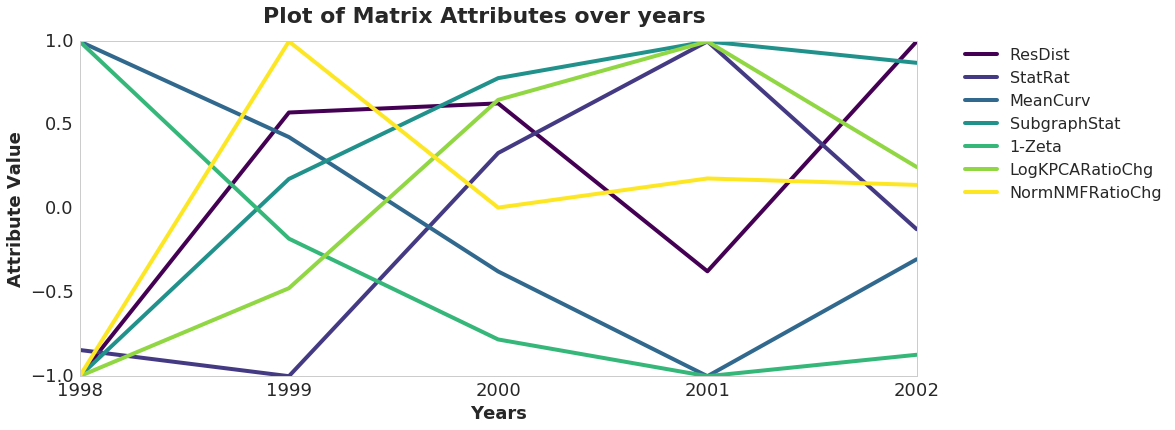

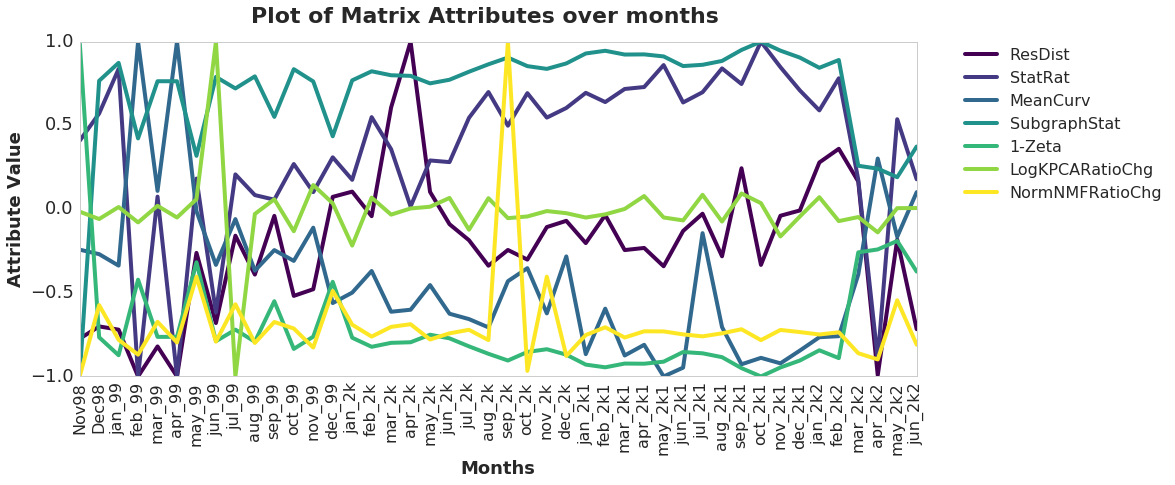

In [288]:
attvol_y.drop(['ZeroCrossRate','LogSpecCentroid'], axis=1).iloc[:,19:].plot.line(use_index=True,cmap='viridis')
plt.xlabel("Years", fontsize=18)
plt.ylabel("Attribute Value", fontsize=18)
plt.legend(fontsize=16, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(np.arange(len(years)),years,fontsize=18)
plt.yticks(fontsize=18)
plt.suptitle("Plot of Matrix Attributes over years", fontsize=22)
plt.autoscale()

attvol_m.drop(['ZeroCrossRate','LogSpecCentroid'], axis=1).iloc[:,19:].plot.line(use_index=True,cmap='viridis', rot=90)
plt.xlabel("Months", fontsize=18)
plt.ylabel("Attribute Value", fontsize=18)
plt.legend(fontsize=16, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(np.arange(len(months)), months,fontsize=16)
plt.yticks(fontsize=18)
plt.suptitle("Plot of Matrix Attributes over months", fontsize=22)
plt.autoscale()

In [289]:
all_cols = list(attvol_m.columns)

In [290]:
attvol_y.shape

(5, 28)

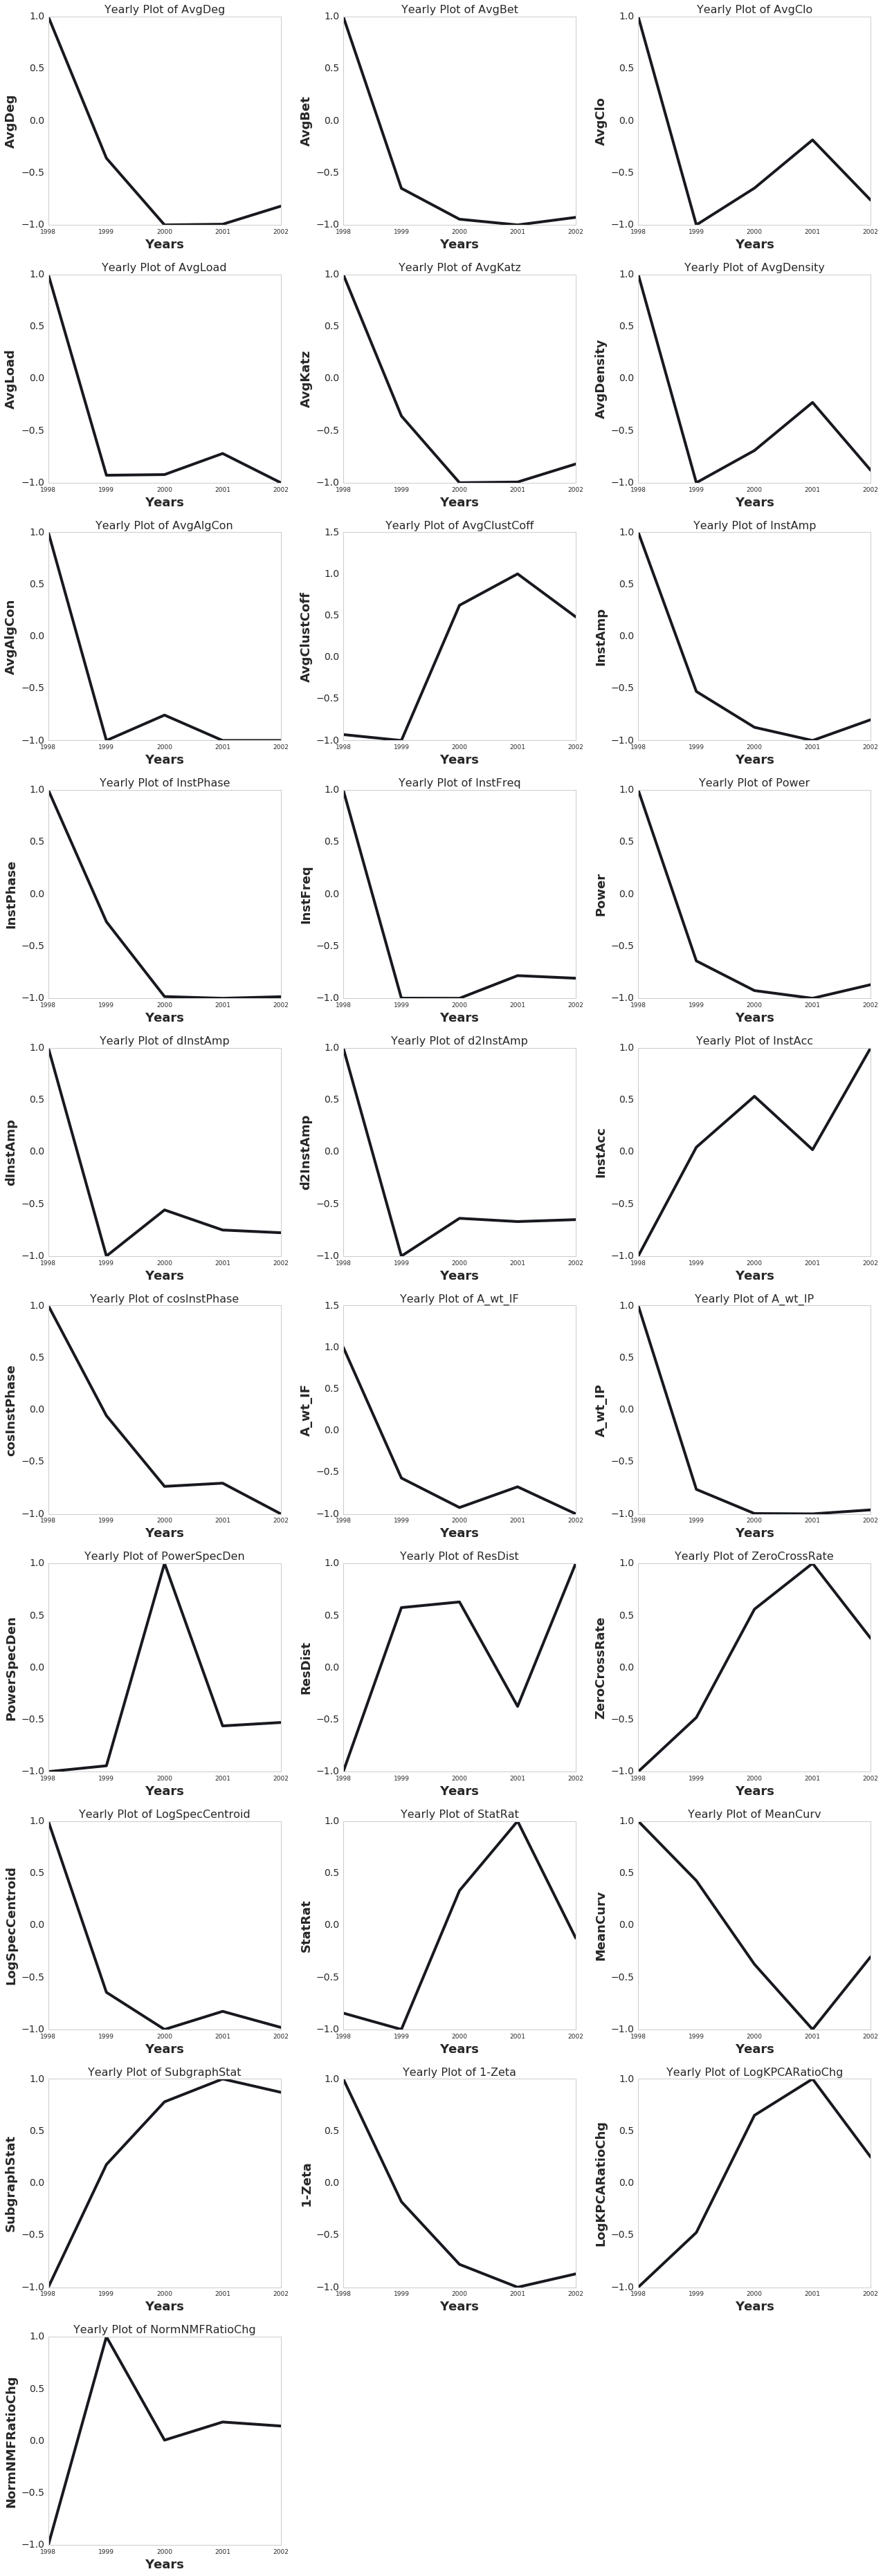

In [291]:
plt.figure(figsize=(18,52))

for i in range(len(all_cols)):
    plt.subplot(10,3,i+1)
    attvol_y.iloc[:,i].plot.line(use_index=True)
    plt.xlabel("Years", fontsize=18)
    plt.ylabel(all_cols[i], fontsize=18)
    plt.xticks(np.arange(len(years)), years,fontsize=9)
    plt.yticks(fontsize=14)
    plt.title("Yearly Plot of " +all_cols[i],fontsize=16)
    plt.tight_layout()

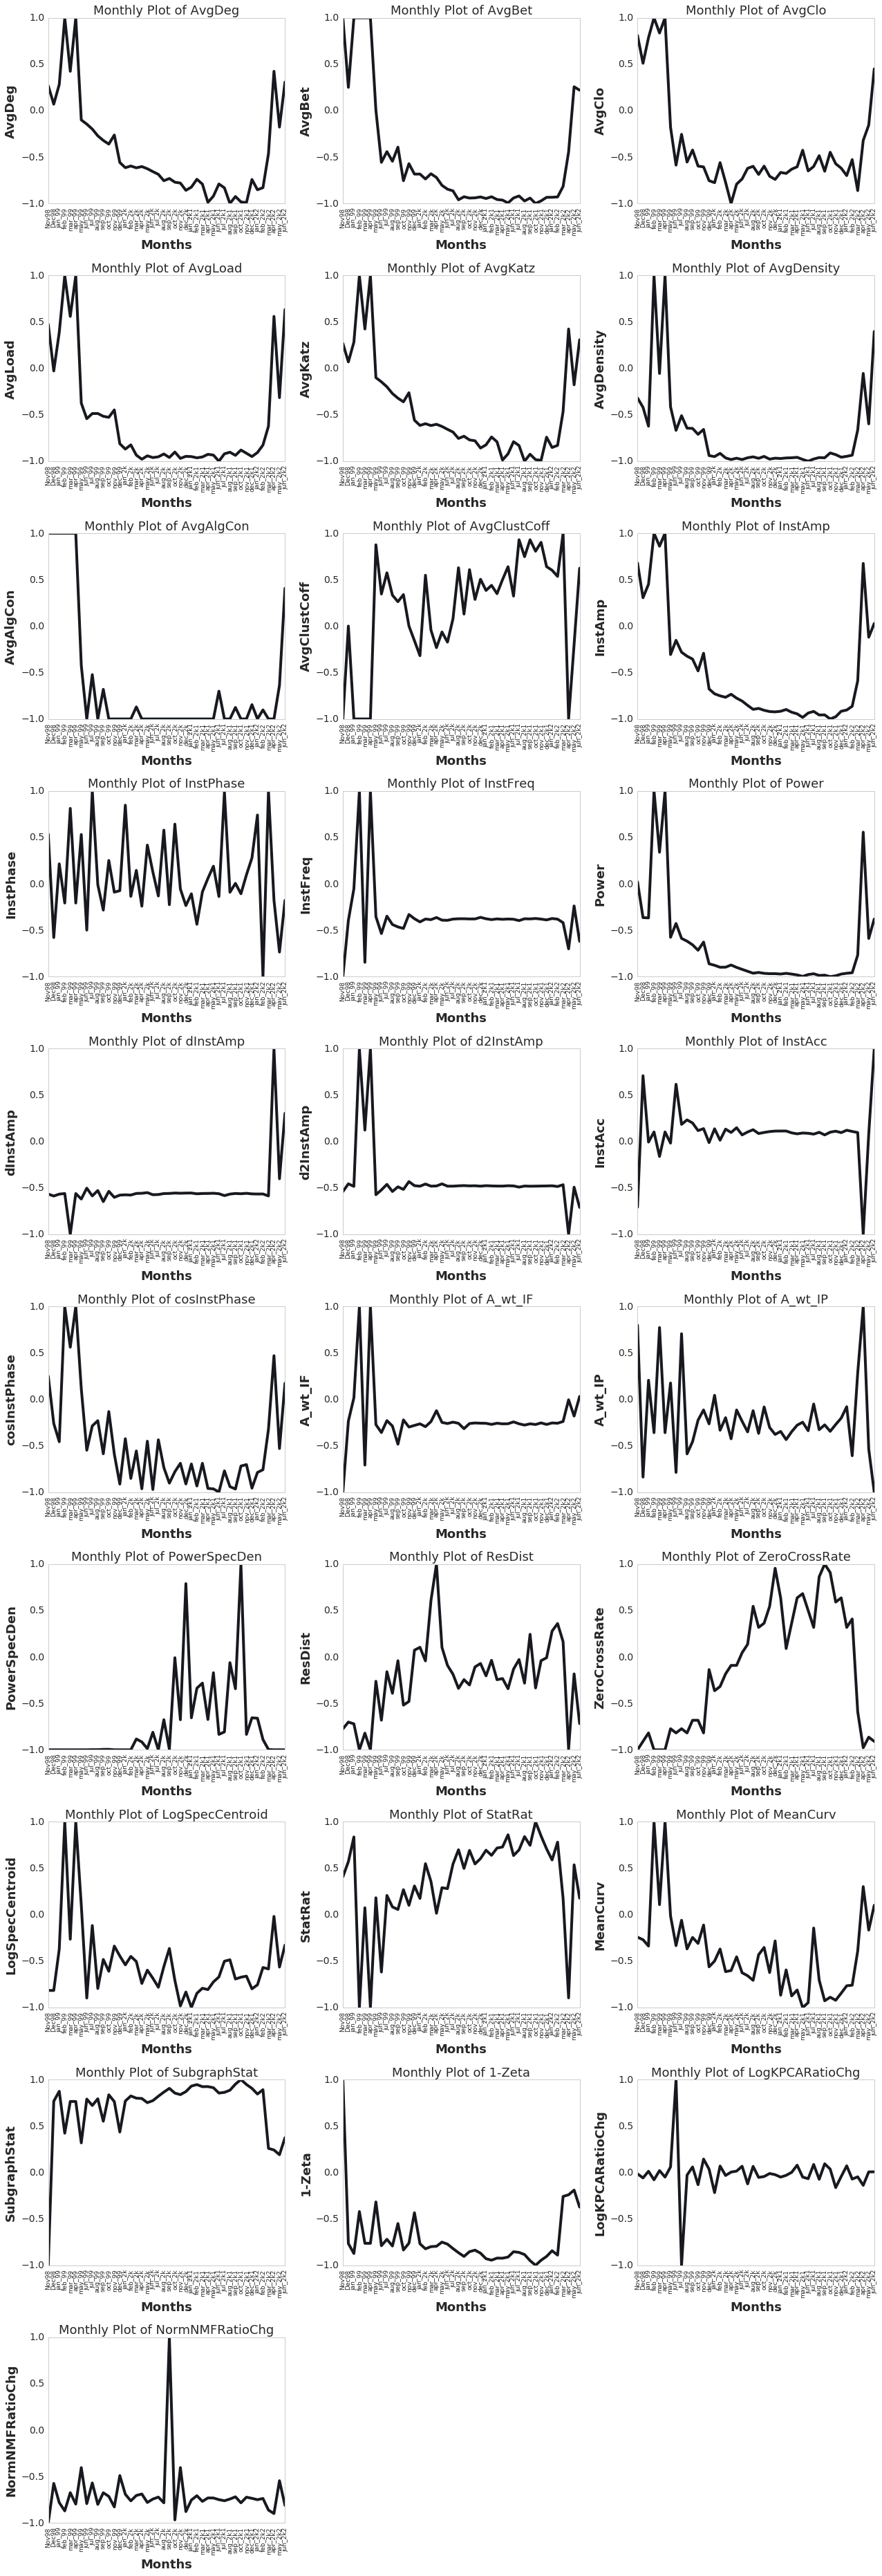

In [292]:
plt.figure(figsize=(18,52))

for i in range(len(all_cols)):
    plt.subplot(10,3,i+1)
    attvol_m.iloc[:,i].plot.line(rot=90)
    plt.xlabel("Months", fontsize=18)
    plt.ylabel(all_cols[i], fontsize=18)
    plt.xticks(np.arange(len(months)), months,fontsize=9)
    plt.yticks(fontsize=14)
    plt.title("Monthly Plot of " +all_cols[i],fontsize=18)
    plt.tight_layout()

# Correlation Analysis

In [293]:
corr_m = attvol_m.corr()
g = sns.clustermap(corr_m, metric='chebyshev')
plt.close()

## Correlation > 0.7

In [294]:
threshold = 0.7
corr_m.values[np.where(abs(corr_m.values) < threshold)] = 0

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5]),
 <a list of 28 Text yticklabel objects>)

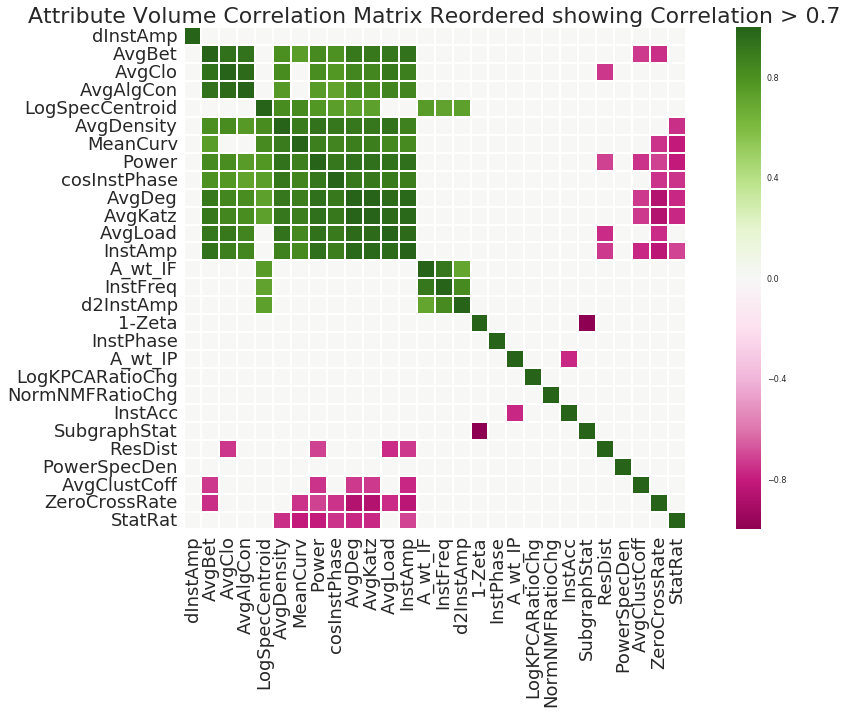

In [295]:
plt.figure(figsize=(18,9))
sns.heatmap(corr_m.iloc[g.dendrogram_col.reordered_ind, g.dendrogram_row.reordered_ind],\
            cmap='PiYG',robust=True, fmt='d', linewidths=1, square=True)
plt.title("Attribute Volume Correlation Matrix Reordered showing Correlation > 0.7", fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

In [296]:
names = corr_m.index.values
G_corr = nx.Graph(corr_m.values)
pos=nx.fruchterman_reingold_layout(G_corr, iterations=1000, k=200)

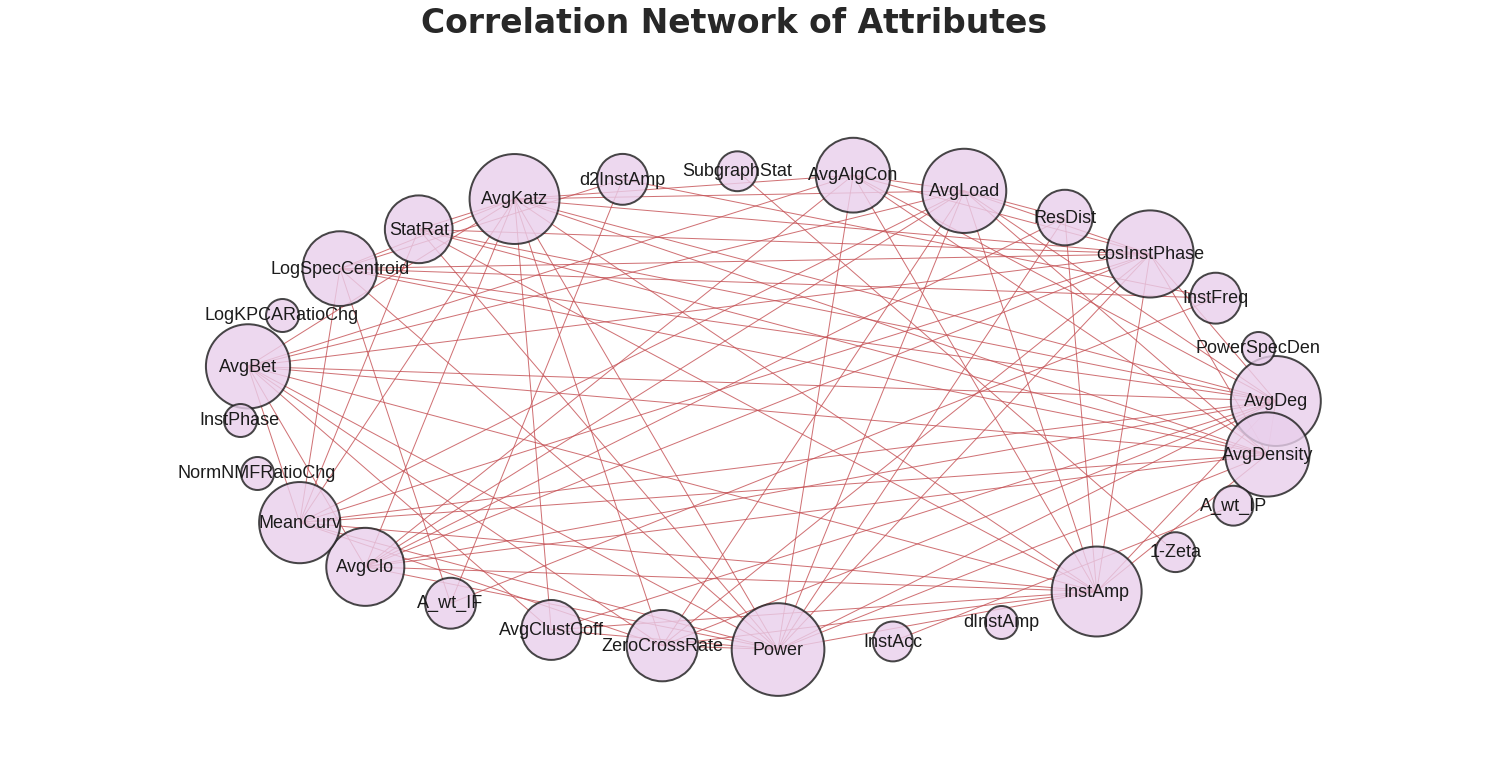

In [297]:
#ref: https://github.com/traims/correlation-based-networks/blob/master/cnetwork.ipynb
components = nx.connected_components(G_corr)
plt.figure(figsize=(26,12))
plt.suptitle("Correlation Network of Attributes", fontsize=33)
plt.axis('off')
for i in components:
    component = G_corr.subgraph(i)
    nx.draw_networkx(component, with_labels = True,node_size = [component.degree(i) * 500 + 88 for i in component.nodes()],\
        labels = dict([(x, names[x]) for x in component.nodes()]), pos=pos, font_size=18, alpha=0.8,\
                    edge_color='r', node_color='#E9CFEC', linewidths=2, fontsize=14, font_color='k')

# Regression Analysis for Feature Ranking

In [298]:
from sklearn.metrics import mean_squared_error
from sklearn import ensemble

In [299]:
def RMS(x, axis=None):
    rms = np.sqrt(np.mean(np.square(x), axis=axis))
    return rms

In [300]:
X= attvol_m.drop(['AvgDeg'],axis=1)
y = attvol_m.AvgDeg

In [301]:
X[:5]

AvgBet    AvgClo   AvgLoad   AvgKatz  AvgDensity  AvgAlgCon  \
0  1.000000  0.810523  0.475524  0.267944   -0.318532        1.0   
1  0.250903  0.509903 -0.027972  0.069435   -0.419219        1.0   
2  1.000000  0.785809  0.388112  0.282044   -0.622808        1.0   
3  1.000000  1.000000  1.000000  1.000000    1.000000        1.0   
4  1.000000  0.835787  0.559441  0.423789   -0.054825        1.0   

   AvgClustCoff   InstAmp  InstPhase  InstFreq       ...         PowerSpecDen  \
0     -1.000000  0.679834   0.535455 -1.000000       ...            -1.000000   
1     -0.000165  0.305093  -0.578269 -0.393695       ...            -1.000000   
2     -1.000000  0.450396   0.214700 -0.052958       ...            -0.999931   
3     -1.000000  1.000000  -0.207114  1.000000       ...            -1.000000   
4     -1.000000  0.860240   0.812100 -0.845407       ...            -1.000000   

    ResDist  ZeroCrossRate  LogSpecCentroid   StatRat  MeanCurv  SubgraphStat  \
0 -0.774637      -1.000000        -0.815713  0.407864 -0.242635     -1.000000   
1 -0.701077      -0.909091        -0.816057  0.570795 -0.269438      0.766117   
2 -0.720470      -0.818182        -0.371199  0.836955 -0.337965      0.873376   
3 -1.000000      -1.000000         1.000000 -1.000000  1.000000      0.421859   
4 -0.820587      -1.000000        -0.264125  0.074177  0.108395      0.763599   

     1-Zeta  LogKPCARatioChg  NormNMFRatioChg  
0  1.000000        -0.015620        -1.000000  
1 -0.766117        -0.059551        -0.573875  
2 -0.873376         0.012093        -0.780922  
3 -0.421859        -0.079774        -0.869723  
4 -0.763599         0.019315        -0.673657  

[5 rows x 27 columns]

In [302]:
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.5)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [303]:
params = {'n_estimators': 10, 'max_depth': 10, 'min_samples_split': 10,
          'learning_rate': 0.1, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=10, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=10, presort='auto',
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

(array([   0.,   20.,   40.,   60.,   80.,  100.]),
 <a list of 6 Text xticklabel objects>)

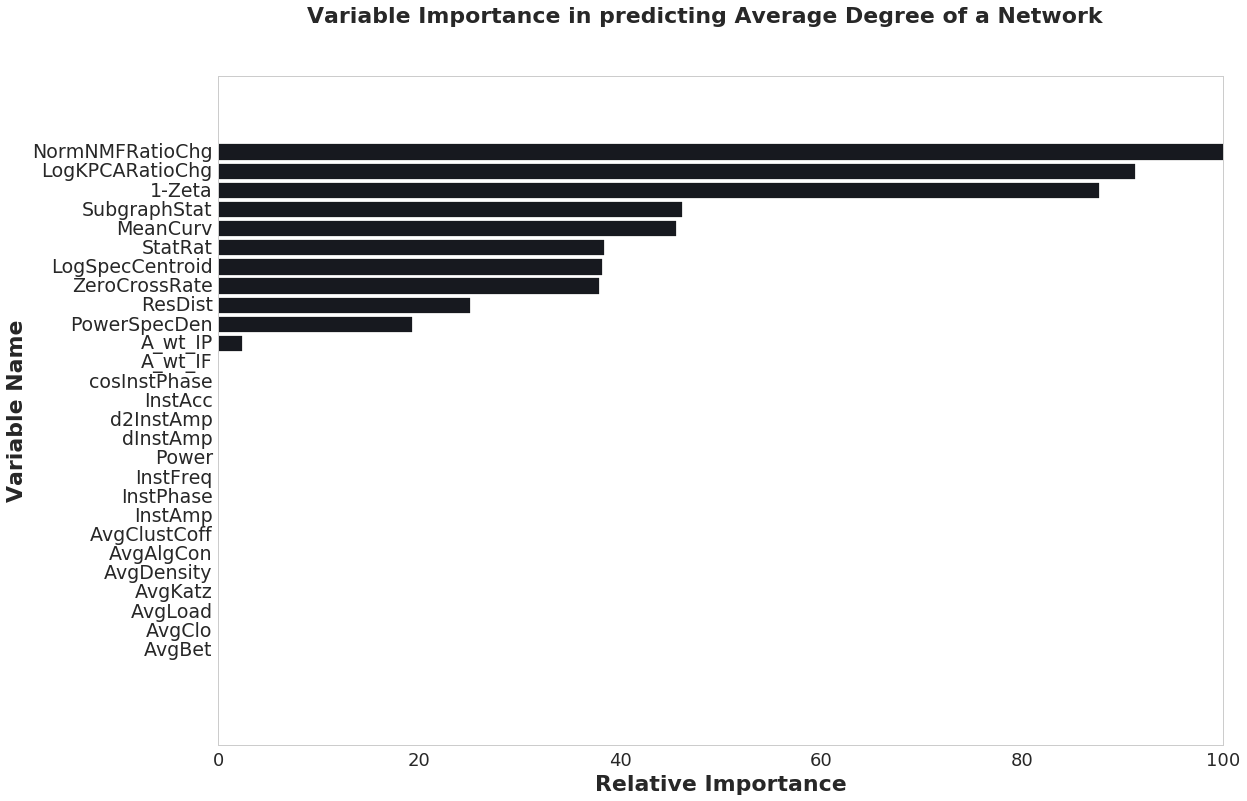

In [304]:
feature_importance = clf.feature_importances_

# make importances relative to max importance
plt.figure(figsize=(18,12))
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(X)
pos = np.arange(sorted_idx.shape[0])
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names, fontsize=19)
plt.ylabel("Variable Name", fontsize=22)
plt.xlabel('Relative Importance', fontsize=22)
plt.suptitle('Variable Importance in predicting Average Degree of a Network', fontsize=22)
plt.xticks(fontsize=18)

(array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ]),
 <a list of 9 Text yticklabel objects>)

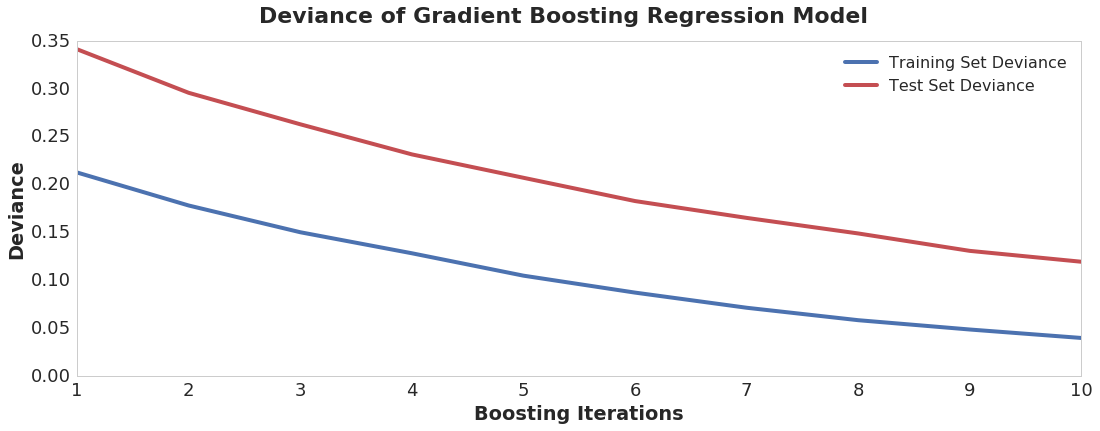

In [305]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(18, 6))
plt.suptitle('Deviance of Gradient Boosting Regression Model',fontsize=22)
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc=1, fontsize=16)
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

In [306]:
mse = mean_squared_error(y_test, clf.predict(X_test))
print("Gradient Boosting MSE: " ,mse)

Gradient Boosting MSE:  0.119637660286


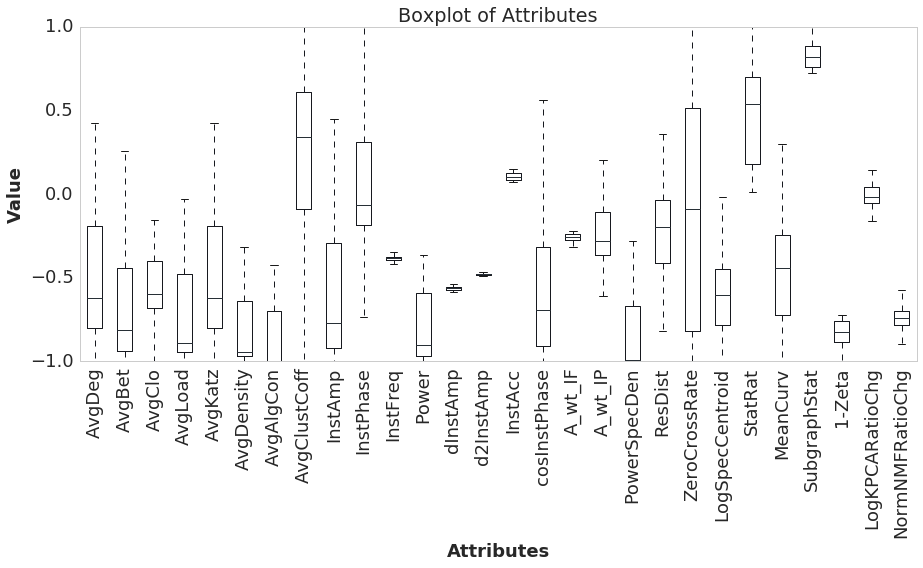

In [312]:
attvol_m.plot.box(rot=90, fontsize=18, title='Boxplot of Attributes')
plt.xlabel('Attributes', fontsize=18)
plt.ylabel('Value', fontsize=18)

# Aggregation Measures

In [317]:
persistence_m = attvol_m.mean(axis=1)/(attvol_m.shape[0]-1)
persistence_y = attvol_y.mean(axis=1)/(attvol_y.shape[0]-1)

In [318]:
def emergence(per):
    tmp = np.asarray(per)
    emerg = []
    for i in range(len(tmp)-1):
        x= int(i)
        y = x +1
        #print(tmp[y], tmp[x])
        if tmp[y]==tmp[x]:
            emerg.append(0)
        elif tmp[y] < (0) or tmp[x] < 0:
            res = (tmp[y]-tmp[x])/(abs(tmp[y])+abs(tmp[x]))
            emerg.append(res)
        else:
            res = (tmp[y]-tmp[x])/max([tmp[y],tmp[x]])
            emerg.append(res)
    tmp2 = np.zeros(len(emerg)+1)
    tmp2[1:] = emerg
    
    return tmp2
            

In [381]:
def NRMS(n):
    nrms = []
    for i in range(len(n)-1):
        x= int(i)
        y = x +1
        a = n[x]
        b = n[y]
        nrms_ = np.divide((RMS(a-b)),(RMS(a)+RMS(b)))
        nrms.append(nrms_)
    tmp2 = np.zeros(len(nrms)+1)
    tmp2[1:] = nrms
    
    return tmp2

In [382]:
rms_m = attvol_m.apply(lambda x: RMS(x), axis=1)

In [383]:
nrms_m = NRMS(rms_m)

In [384]:
emerg_m = emergence(persistence_m)
emerg_y = emergence(persistence_y)

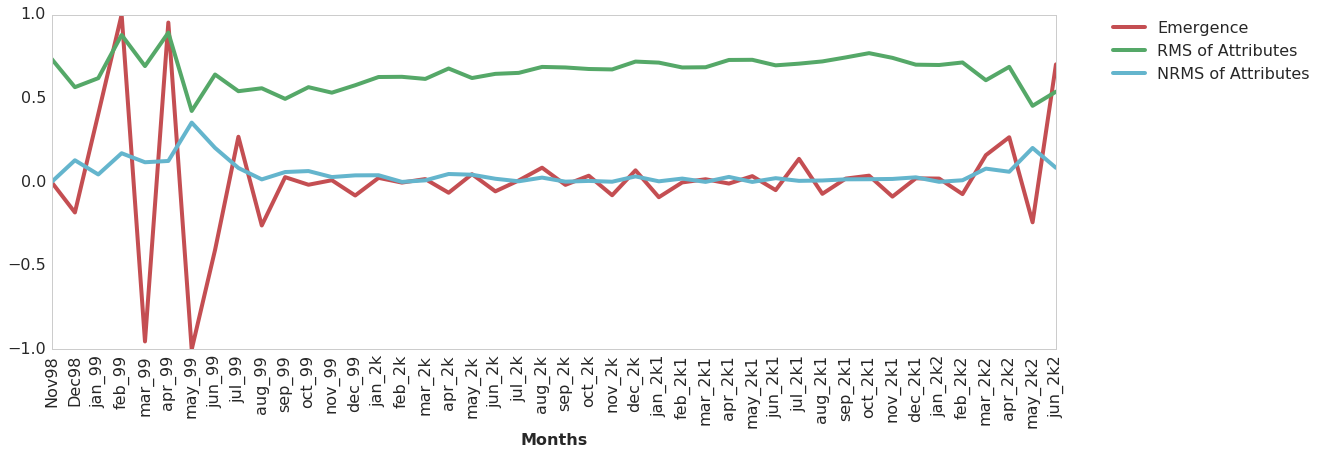

In [387]:
plt.figure(figsize=(18,6))

plt.plot(emerg_m,'r', label='Emergence')
plt.plot(rms_m,'g',label='RMS of Attributes',)
plt.plot(nrms_m,'c',label='NRMS of Attributes')
plt.xticks(np.arange(len(months)), months,fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.xlabel('Months', fontsize=16)
plt.legend(fontsize=16, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.autoscale()

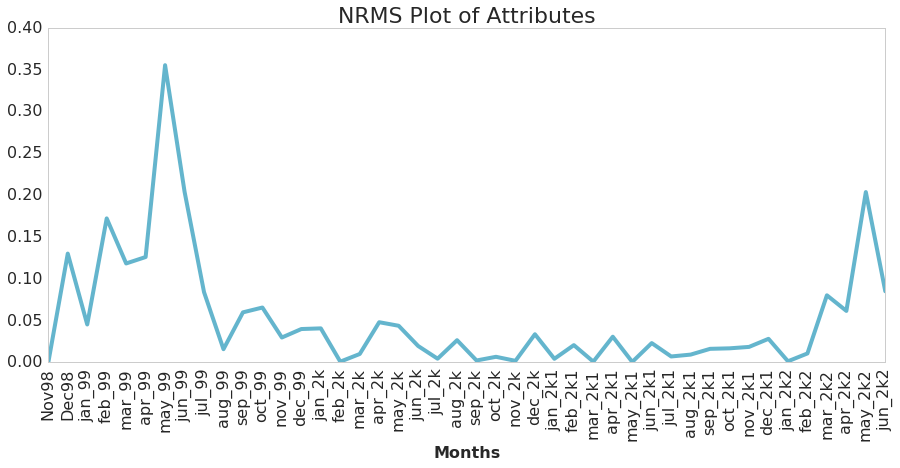

In [386]:
plt.plot(nrms_m,'c',label='NRMS of Attributes')
plt.title("NRMS Plot of Attributes", fontsize=22)
plt.xticks(np.arange(len(months)), months,fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.xlabel('Months', fontsize=16)
#plt.legend(fontsize=16, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.autoscale()